In [ ]:
import pandas as pd
# Read the CSV file
df0 = pd.read_csv('train.csv')
# source: https://www.kaggle.com/competitions/rsna-breast-cancer-detection/data?select=train.csv
df0

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Go to the "Account" tab in your profile (https://www.kaggle.com/YOUR_USERNAME/account).

#### Scroll down to the "API" section and click on the "Create New API Token" button. This will download a file called kaggle.json. Keep it safe as it contains your API credentials.

In [ ]:
import os

def upload_file():
    file_path = input("Enter the path to the file you want to upload: ")

    if not os.path.isfile(file_path):
        print("The provided path is not a file. Please try again.")
        return None

    file_name = os.path.basename(file_path)

    with open(file_path, "rb") as f:
        file_content = f.read()

    print(f"Uploaded file: {file_name}")
    return file_name, file_content

In [ ]:
# okimport os

# downloads_folder = os.path.join(os.path.expanduser("~"), "Downloads")
# kaggle_file_path = os.path.join(downloads_folder, "kaggle.json")
# print(kaggle_file_path)

/Users/spartan/Downloads/kaggle.json


In [ ]:
# Upload your kaggle.json file to Google Colab:
# A file upload dialog will appear. Select the kaggle.json file you downloaded earlier from your local system.
from google.colab import files
files.upload()

# file_name, file_content = upload_file()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kapilwanaskar","key":"841a9333dc006921ac85d6cd39008df0"}'}

In [ ]:
# import os
# print(os.getcwd())

/Users/spartan


In [ ]:
# Move the kaggle.json file to the correct location and set the appropriate permissions:
# FOR GOOGLE COLLAB
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Make sure to use the dataset's API command found on the dataset page under the "Three Dots" menu > "Copy API command":

# source: https://www.kaggle.com/datasets/theoviel/rsna-breast-cancer-256-pngs
!kaggle datasets download -d theoviel/rsna-breast-cancer-256-pngs #[1 GB]

# source: https://www.kaggle.com/datasets/theoviel/rsna-breast-cancer-512-pngs
# !kaggle datasets download -d theoviel/rsna-breast-cancer-512-pngs #[4 GB]

# source: https://www.kaggle.com/datasets/theoviel/rsna-breast-cancer-1024-pngs
# !kaggle datasets download -d theoviel/rsna-breast-cancer-1024-pngs #[14 GB]

100% 995M/998M [00:11<00:00, 80.3MB/s]
100% 998M/998M [00:11<00:00, 87.5MB/s]


In [ ]:
# Unzip the downloaded dataset:
!unzip rsna-breast-cancer-256-pngs.zip

Streaming output truncated to the last 5000 lines.
  inflating: 63617_159110654.png     
  inflating: 63617_1855699072.png    
  inflating: 63617_1917877119.png    
  inflating: 63617_887426674.png     
  inflating: 63623_1186739164.png    
  inflating: 63623_1657034655.png    
  inflating: 63623_335778602.png     
  inflating: 63623_625719002.png     
  inflating: 63626_1154699412.png    
  inflating: 63626_549972940.png     
  inflating: 63626_599167493.png     
  inflating: 63626_939566995.png     
  inflating: 63627_1214214469.png    
  inflating: 63627_191294190.png     
  inflating: 63627_669536679.png     
  inflating: 63627_92618283.png      
  inflating: 63628_1068923688.png    
  inflating: 63628_1252453513.png    
  inflating: 63628_1987323650.png    
  inflating: 63628_882454541.png     
  inflating: 63630_1460649623.png    
  inflating: 63630_201599249.png     
  inflating: 63630_2076739376.png    
  inflating: 63630_459372349.png     
  inflating: 63636_1357547457.png    

Dataset Description

## Note: The dataset  contains radiographic breast images of female subjects.
# The goal: is to identify cases of breast cancer in mammograms from screening exams.

It is important to identify cases of cancer for obvious reasons, but false positives also have downsides for patients. As millions of women get mammograms each year, a useful machine learning tool could help a great many people.

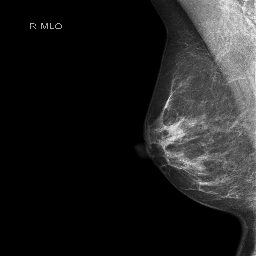

In [ ]:
from IPython.display import Image
Image('/content/10011_1031443799.png')

When working with images in a machine learning task like identifying cases of breast cancer in mammograms, there are a variety of features that can be extracted from the images. Here are some common types of features that can be extracted:

[1] Pixel-based features: This involves extracting features directly from the pixels of the images, such as color intensity, texture, and shape.

[2] Statistical features: This involves calculating statistical properties of the pixel values in the images, such as mean, variance, and skewness.

[3] Structural features: This involves analyzing the structure of the images, such as identifying edges, shapes, and patterns.

[4] Domain-specific features: This involves extracting features that are specific to the domain of breast cancer detection, such as the presence of masses, calcifications, or architectural distortions.

[5] Deep learning features: This involves using pre-trained convolutional neural networks (CNNs) to extract features from the images, which can be used as input to a machine learning model.

### Some specific examples of features that could be extracted from mammogram images include:

[1] Mean and standard deviation of pixel values in the image

[2] Histogram of pixel values in the image

[3] Texture features, such as gray-level co-occurrence matrix (GLCM) features or gray-level run length matrix (GLRLM) features

[4] Shape features, such as the circularity or compactness of masses or the branching structure of ductal carcinoma in situ (DCIS)

[5] Features related to the distribution and density of microcalcifications, such as their size, shape, and clustering

[6] Deep learning features extracted from pre-trained CNNs such as VGG, ResNet, or Inception models.

Ultimately, the specific features that are most useful for identifying breast cancer in mammograms will depend on the particular dataset and the goals of the machine learning task. It is important to carefully analyze the images and experiment with different feature extraction methods to determine which features are most predictive of cancer.





Regenerate response


In [ ]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [ ]:
# Following code uses the opencv and tensorflow packages, so make sure to install them in your Google Colab environment
!pip install tensorflow
!pip install opencv-python-headless tensorflow
!pip install scikit-image
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### This code will create a DataFrame containing

#### the mean and standard deviation of pixel values, histogram of pixel values, GLCM features, and deep learning features extracted using the VGG16 model and extract additional features like color intensity, variance, skewness, and edges

#### for all images in the /content folder.

#### The extracted features will be saved to a CSV file

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from skimage.feature import greycomatrix, greycoprops, canny
from skimage.measure import regionprops, label
from skimage.morphology import closing, square, remove_small_objects
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image as tf_image
from scipy.stats import skew

In [ ]:
# Function to calculate GLCM features
def glcm_features(gray_image):
    glcm = greycomatrix(gray_image, [1], [0],  symmetric=True, normed=True)
    contrast = greycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
    energy = greycoprops(glcm, 'energy')[0, 0]
    correlation = greycoprops(glcm, 'correlation')[0, 0]
    return [contrast, dissimilarity, homogeneity, energy, correlation]

# Function to load VGG16 model
# def load_vgg16_model():
#     model = VGG16(weights='imagenet', include_top=False)
#     return model

# Function to extract deep learning features using VGG16
def extract_vgg16_features(model, img):
    img = cv2.resize(img, (224, 224))
    img = tf_image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    print("Input image shape:", img.shape)
    features = model.predict(img)
    return features.flatten()

from skimage.filters import threshold_otsu

# Function to calculate shape features (circularity and compactness)
def shape_features(img):
    # Apply binary threshold
    thresh = threshold_otsu(img)
    binary_img = img > thresh

    # Label the binary image
    labeled_img = label(binary_img)
    properties = regionprops(labeled_img)

    if not properties:
        return [None, None]

    area = properties[0].area
    perimeter = properties[0].perimeter
    compactness = (perimeter**2) / (4 * np.pi * area) if area > 0 and perimeter > 0 else None
    circularity = 4 * np.pi * area / (perimeter**2) if area > 0 and perimeter > 0 else None

    return [compactness, circularity]

# Function to extract microcalcification features (size, shape, and clustering)
def microcalcification_features(img):
    binary_img = closing(img > np.mean(img), square(3))
    labeled_img = label(binary_img)
    remove_small_objects(labeled_img, 10, in_place=True)

    properties = regionprops(labeled_img)
    areas = [prop.area for prop in properties]
    solidity = [prop.solidity for prop in properties]

    if not areas:
        return [None, None, None]

    mean_size = np.mean(areas)
    mean_solidity = np.mean(solidity)
    clustering = len(areas) / np.sum(areas)

    return [mean_size, mean_solidity, clustering]

In [ ]:
# # Load VGG16 model
# vgg16_model = load_vgg16_model()

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
# Initialize an empty list to store image features
image_features = []

# Iterate through images in the /content folder
images_folder = "/content"  # Replace this with the path to your folder containing the image files
# image_count = 0

for file_name in os.listdir(images_folder):
  # if image_count >= 15000:
  #       break
  # for file_name in os.listdir('/content'):
  if file_name.endswith('.png'):
      # Read the image
      img = cv2.imread(os.path.join(images_folder, file_name))

      # Convert image to grayscale
      gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      # Calculate color intensity
      color_intensity = np.mean(img, axis=(0, 1))

      # Calculate variance
      variance = np.var(gray_img)

      # Calculate skewness
      skewness = skew(gray_img.flatten())

      # Calculate edges
      edges = canny(gray_img)

      # Extract features
      mean_pixel_value = np.mean(gray_img)
      std_pixel_value = np.std(gray_img)
      #histogram = cv2.calcHist([gray_img], [0], None, [256], [0, 256]).flatten()
      glcm = glcm_features(gray_img)
      #vgg16_features = extract_vgg16_features(vgg16_model, img)
      shape = shape_features(gray_img)
      microcalcifications = microcalcification_features(gray_img)

      # Append features to the list
      image_features.append([file_name] + list(color_intensity) + [mean_pixel_value, std_pixel_value, variance, skewness] + \
                            #list(histogram) + \
                            glcm + \
                            #list(vgg16_features) + \
                            shape + microcalcifications + [np.sum(edges)])

      # # Increment image counter
      # image_count += 1

# Create a DataFrame from the extracted features
df = pd.DataFrame(image_features, columns=['file_name', 'color_intensity_r', 'color_intensity_g', 'color_intensity_b', 'mean_pixel_value', 'std_pixel_value', 'variance', 'skewness'] +\
                  #[f'hist_{i}' for i in range(256)] +\
                  ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation'] +\
                  #[f'vgg16_{i}' for i in range(vgg16_features.shape[0])] +\
                  ['compactness', 'circularity', 'mean_microcalcification_size', 'mean_microcalcification_solidity', 'microcalcification_clustering'] + ['edge_count'])

# Save the DataFrame to a CSV file
df.to_csv('image_features.csv', index=False)

df

Streaming output truncated to the last 5000 lines.
<ipython-input-40-527bfec102c9>:52: FutureWarning: in_place argument is deprecated and will be removed in version 1.0. To avoid this warning, please do not use the in_place argument. Please see remove_small_objects documentation for more details. Please use out argument instead.
  remove_small_objects(labeled_img, 10, in_place=True)
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and 

,file_name,color_intensity_r,color_intensity_g,color_intensity_b,mean_pixel_value,std_pixel_value,variance,skewness,contrast,dissimilarity,homogeneity,energy,correlation,compactness,circularity,mean_microcalcification_size,mean_microcalcification_solidity,microcalcification_clustering,edge_count
0,24231_1599132094.png,21.669540,21.669540,21.669540,21.669540,41.618134,1732.069065,2.223763,186.391054,4.740319,0.738934,0.717738,0.945239,1.763551,0.567038,6108.000000,0.955647,0.000164,4597
1,10838_591123709.png,80.702255,80.702255,80.702255,80.702255,69.249010,4795.425401,-0.185761,161.732475,3.305760,0.546746,0.401561,0.983138,1.449887,0.689709,9537.000000,0.782947,0.000105,2516
2,27667_830917739.png,45.809540,45.809540,45.809540,45.809540,54.380373,2957.224955,1.319218,279.208655,7.965273,0.477914,0.428876,0.952296,90.460641,0.011055,6740.800000,0.689265,0.000148,9554
3,16339_1765002339.png,21.175934,21.175934,21.175934,21.175934,47.596471,2265.424064,1.864654,31.575797,1.287500,0.856744,0.830683,0.993008,1.633181,0.612302,11045.000000,0.989961,0.000091,771
4,2606_72547626.png,21.496078,21.496078,21.496078,21.496078,40.860531,1669.583023,2.136658,234.588542,5.211305,0.733388,0.714486,0.929630,0.284205,3.518584,6112.666667,0.797956,0.000164,5360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,57444_2114947064.png,30.386978,30.386978,30.386978,30.386978,50.009012,2500.901319,1.742150,449.614308,8.546599,0.651652,0.630022,0.909541,5.948721,0.168103,7825.000000,0.909124,0.000128,7030
54702,1878_189362032.png,35.229370,35.229370,35.229370,35.229370,39.112316,1529.773256,1.029031,325.719899,8.158716,0.504453,0.460307,0.892939,NaN,NaN,17011.500000,0.748762,0.000059,8153
54703,45339_1546789692.png,43.123657,43.123657,43.123657,43.123657,74.371804,5531.165159,1.178659,30.847656,1.471890,0.796928,0.739536,0.997207,1.437817,0.695499,16616.000000,0.991645,0.000060,1781
54704,23855_1024724669.png,24.096588,24.096588,24.096588,24.096588,37.214050,1384.885507,1.505538,180.844393,4.979596,0.673638,0.641906,0.934272,NaN,NaN,5786.750000,0.817177,0.000173,6164


In [ ]:
df

,file_name,color_intensity_r,color_intensity_g,color_intensity_b,mean_pixel_value,std_pixel_value,variance,skewness,contrast,dissimilarity,homogeneity,energy,correlation,compactness,circularity,mean_microcalcification_size,mean_microcalcification_solidity,microcalcification_clustering,edge_count
0,24231_1599132094.png,21.669540,21.669540,21.669540,21.669540,41.618134,1732.069065,2.223763,186.391054,4.740319,0.738934,0.717738,0.945239,1.763551,0.567038,6108.000000,0.955647,0.000164,4597
1,10838_591123709.png,80.702255,80.702255,80.702255,80.702255,69.249010,4795.425401,-0.185761,161.732475,3.305760,0.546746,0.401561,0.983138,1.449887,0.689709,9537.000000,0.782947,0.000105,2516
2,27667_830917739.png,45.809540,45.809540,45.809540,45.809540,54.380373,2957.224955,1.319218,279.208655,7.965273,0.477914,0.428876,0.952296,90.460641,0.011055,6740.800000,0.689265,0.000148,9554
3,16339_1765002339.png,21.175934,21.175934,21.175934,21.175934,47.596471,2265.424064,1.864654,31.575797,1.287500,0.856744,0.830683,0.993008,1.633181,0.612302,11045.000000,0.989961,0.000091,771
4,2606_72547626.png,21.496078,21.496078,21.496078,21.496078,40.860531,1669.583023,2.136658,234.588542,5.211305,0.733388,0.714486,0.929630,0.284205,3.518584,6112.666667,0.797956,0.000164,5360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,57444_2114947064.png,30.386978,30.386978,30.386978,30.386978,50.009012,2500.901319,1.742150,449.614308,8.546599,0.651652,0.630022,0.909541,5.948721,0.168103,7825.000000,0.909124,0.000128,7030
54702,1878_189362032.png,35.229370,35.229370,35.229370,35.229370,39.112316,1529.773256,1.029031,325.719899,8.158716,0.504453,0.460307,0.892939,NaN,NaN,17011.500000,0.748762,0.000059,8153
54703,45339_1546789692.png,43.123657,43.123657,43.123657,43.123657,74.371804,5531.165159,1.178659,30.847656,1.471890,0.796928,0.739536,0.997207,1.437817,0.695499,16616.000000,0.991645,0.000060,1781
54704,23855_1024724669.png,24.096588,24.096588,24.096588,24.096588,37.214050,1384.885507,1.505538,180.844393,4.979596,0.673638,0.641906,0.934272,NaN,NaN,5786.750000,0.817177,0.000173,6164


In [ ]:
# save file as csv
df.to_csv('image_features.csv', index=False)


In [ ]:
# save file as csv
df.to_csv('image_features.csv', index=False)

# download file to local machine
from google.colab import files

file_name = 'image_features.csv'
df.to_csv(file_name, index=False)
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
# Read the CSV file into a pandas DataFrame
df1 = pd.read_csv('image_features.csv')
df1

,file_name,color_intensity_r,color_intensity_g,color_intensity_b,mean_pixel_value,std_pixel_value,variance,skewness,contrast,dissimilarity,homogeneity,energy,correlation,compactness,circularity,mean_microcalcification_size,mean_microcalcification_solidity,microcalcification_clustering,edge_count
0,24231_1599132094.png,21.669540,21.669540,21.669540,21.669540,41.618134,1732.069065,2.223763,186.391054,4.740319,0.738934,0.717738,0.945239,1.763551,0.567038,6108.000000,0.955647,0.000164,4597
1,10838_591123709.png,80.702255,80.702255,80.702255,80.702255,69.249010,4795.425401,-0.185761,161.732475,3.305760,0.546746,0.401561,0.983138,1.449887,0.689709,9537.000000,0.782947,0.000105,2516
2,27667_830917739.png,45.809540,45.809540,45.809540,45.809540,54.380373,2957.224955,1.319218,279.208655,7.965273,0.477914,0.428876,0.952296,90.460641,0.011055,6740.800000,0.689265,0.000148,9554
3,16339_1765002339.png,21.175934,21.175934,21.175934,21.175934,47.596471,2265.424064,1.864654,31.575797,1.287500,0.856744,0.830683,0.993008,1.633181,0.612302,11045.000000,0.989961,0.000091,771
4,2606_72547626.png,21.496078,21.496078,21.496078,21.496078,40.860531,1669.583023,2.136658,234.588542,5.211305,0.733388,0.714486,0.929630,0.284205,3.518584,6112.666667,0.797956,0.000164,5360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,57444_2114947064.png,30.386978,30.386978,30.386978,30.386978,50.009012,2500.901319,1.742150,449.614308,8.546599,0.651652,0.630022,0.909541,5.948721,0.168103,7825.000000,0.909124,0.000128,7030
54702,1878_189362032.png,35.229370,35.229370,35.229370,35.229370,39.112316,1529.773256,1.029031,325.719899,8.158716,0.504453,0.460307,0.892939,NaN,NaN,17011.500000,0.748762,0.000059,8153
54703,45339_1546789692.png,43.123657,43.123657,43.123657,43.123657,74.371804,5531.165159,1.178659,30.847656,1.471890,0.796928,0.739536,0.997207,1.437817,0.695499,16616.000000,0.991645,0.000060,1781
54704,23855_1024724669.png,24.096588,24.096588,24.096588,24.096588,37.214050,1384.885507,1.505538,180.844393,4.979596,0.673638,0.641906,0.934272,NaN,NaN,5786.750000,0.817177,0.000173,6164


In [ ]:
df0 = pd.read_csv("train.csv")
df0

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [ ]:
import pandas as pd

# Read the dataset
df0 = pd.read_csv('train.csv')

# Create the new "file_name" column
df0['file_name'] = df0['patient_id'].astype(str) + '_' + df0['image_id'].astype(str) + '.png'

# Move the "file_name" column to the first position in the DataFrame
cols = df0.columns.tolist()
cols.insert(0, cols.pop(cols.index('file_name')))
df0 = df0.reindex(columns=cols)

# Check the updated DataFrame
df0

,file_name,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,10006_462822612.png,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,10006_1459541791.png,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,10006_1864590858.png,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,10006_1874946579.png,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,10011_220375232.png,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,9973_1729524723.png,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,9989_63473691.png,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,9989_1078943060.png,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,9989_398038886.png,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [ ]:
import pandas as pd

# Merge the dataframes on the "file_name" column
merged_df = pd.merge(df0, df1, on='file_name')

# Check the merged DataFrame
print(merged_df.shape)
merged_df

(54706, 33)


,file_name,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,...,dissimilarity,homogeneity,energy,correlation,compactness,circularity,mean_microcalcification_size,mean_microcalcification_solidity,microcalcification_clustering,edge_count
0,10006_462822612.png,2,10006,462822612,L,CC,61.0,0,0,0,...,2.006679,0.894181,0.883844,0.975226,27.375065,0.036530,3660.500000,0.993003,0.000273,1612
1,10006_1459541791.png,2,10006,1459541791,L,MLO,61.0,0,0,0,...,2.785983,0.825138,0.807728,0.984704,3.095282,0.323072,6146.500000,0.918269,0.000163,2207
2,10006_1864590858.png,2,10006,1864590858,R,MLO,61.0,0,0,0,...,2.556648,0.837710,0.821774,0.984543,29.268959,0.034166,3791.666667,0.961966,0.000264,1836
3,10006_1874946579.png,2,10006,1874946579,R,CC,61.0,0,0,0,...,1.844593,0.905841,0.897936,0.974905,27.294815,0.036637,3203.000000,0.993263,0.000312,1574
4,10011_220375232.png,2,10011,220375232,L,CC,55.0,0,0,0,...,3.131832,0.757028,0.729378,0.979597,NaN,NaN,4281.250000,0.788308,0.000234,3630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,9973_1729524723.png,1,9973,1729524723,R,MLO,43.0,0,0,0,...,10.118842,0.470474,0.432695,0.926116,242.885251,0.004117,10818.000000,0.798795,0.000092,10985
54702,9989_63473691.png,1,9989,63473691,L,MLO,60.0,0,0,0,...,1.556541,0.751451,0.642704,0.996688,1.775761,0.563139,22924.000000,0.944541,0.000044,856
54703,9989_1078943060.png,1,9989,1078943060,L,CC,60.0,0,0,0,...,0.943275,0.813348,0.383651,0.996606,1.498950,0.667134,13751.000000,0.991706,0.000073,522
54704,9989_398038886.png,1,9989,398038886,R,MLO,60.0,0,0,0,...,1.577145,0.703381,0.365834,0.997140,1.581003,0.632510,25344.000000,0.971146,0.000039,805


In [ ]:
# save file as csv
merged_df.to_csv('merged_features.csv', index=False)

# download file to local machine
from google.colab import files

file_name = 'merged_features.csv'
merged_df.to_csv(file_name, index=False)
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,file_name,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,...,dissimilarity,homogeneity,energy,correlation,compactness,circularity,mean_microcalcification_size,mean_microcalcification_solidity,microcalcification_clustering,edge_count
0,10006_462822612.png,2,10006,462822612,L,CC,61.0,0,0,0,...,2.006679,0.894181,0.883844,0.975226,27.375065,0.036530,3660.500000,0.993003,0.000273,1612
1,10006_1459541791.png,2,10006,1459541791,L,MLO,61.0,0,0,0,...,2.785983,0.825138,0.807728,0.984704,3.095282,0.323072,6146.500000,0.918269,0.000163,2207
2,10006_1864590858.png,2,10006,1864590858,R,MLO,61.0,0,0,0,...,2.556648,0.837710,0.821774,0.984543,29.268959,0.034166,3791.666667,0.961966,0.000264,1836
3,10006_1874946579.png,2,10006,1874946579,R,CC,61.0,0,0,0,...,1.844593,0.905841,0.897936,0.974905,27.294815,0.036637,3203.000000,0.993263,0.000312,1574
4,10011_220375232.png,2,10011,220375232,L,CC,55.0,0,0,0,...,3.131832,0.757028,0.729378,0.979597,NaN,NaN,4281.250000,0.788308,0.000234,3630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,9973_1729524723.png,1,9973,1729524723,R,MLO,43.0,0,0,0,...,10.118842,0.470474,0.432695,0.926116,242.885251,0.004117,10818.000000,0.798795,0.000092,10985
54702,9989_63473691.png,1,9989,63473691,L,MLO,60.0,0,0,0,...,1.556541,0.751451,0.642704,0.996688,1.775761,0.563139,22924.000000,0.944541,0.000044,856
54703,9989_1078943060.png,1,9989,1078943060,L,CC,60.0,0,0,0,...,0.943275,0.813348,0.383651,0.996606,1.498950,0.667134,13751.000000,0.991706,0.000073,522
54704,9989_398038886.png,1,9989,398038886,R,MLO,60.0,0,0,0,...,1.577145,0.703381,0.365834,0.997140,1.581003,0.632510,25344.000000,0.971146,0.000039,805


In [ ]:
import pandas as pd
merged_df = pd.read_csv('merged_features.csv')
merged_df

,file_name,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,...,dissimilarity,homogeneity,energy,correlation,compactness,circularity,mean_microcalcification_size,mean_microcalcification_solidity,microcalcification_clustering,edge_count
0,10006_462822612.png,2,10006,462822612,L,CC,61.0,0,0,0,...,2.006679,0.894181,0.883844,0.975226,27.375065,0.036530,3660.500000,0.993003,0.000273,1612
1,10006_1459541791.png,2,10006,1459541791,L,MLO,61.0,0,0,0,...,2.785983,0.825138,0.807728,0.984704,3.095282,0.323072,6146.500000,0.918269,0.000163,2207
2,10006_1864590858.png,2,10006,1864590858,R,MLO,61.0,0,0,0,...,2.556648,0.837710,0.821774,0.984543,29.268959,0.034166,3791.666667,0.961966,0.000264,1836
3,10006_1874946579.png,2,10006,1874946579,R,CC,61.0,0,0,0,...,1.844593,0.905841,0.897936,0.974905,27.294815,0.036637,3203.000000,0.993263,0.000312,1574
4,10011_220375232.png,2,10011,220375232,L,CC,55.0,0,0,0,...,3.131832,0.757028,0.729378,0.979597,NaN,NaN,4281.250000,0.788308,0.000234,3630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,9973_1729524723.png,1,9973,1729524723,R,MLO,43.0,0,0,0,...,10.118842,0.470474,0.432695,0.926116,242.885251,0.004117,10818.000000,0.798795,0.000092,10985
54702,9989_63473691.png,1,9989,63473691,L,MLO,60.0,0,0,0,...,1.556541,0.751451,0.642704,0.996688,1.775761,0.563139,22924.000000,0.944541,0.000044,856
54703,9989_1078943060.png,1,9989,1078943060,L,CC,60.0,0,0,0,...,0.943275,0.813348,0.383651,0.996606,1.498950,0.667134,13751.000000,0.991706,0.000073,522
54704,9989_398038886.png,1,9989,398038886,R,MLO,60.0,0,0,0,...,1.577145,0.703381,0.365834,0.997140,1.581003,0.632510,25344.000000,0.971146,0.000039,805


In [ ]:
# # Drop the first 4 columns
# merged_df = merged_df.drop(merged_df.columns[:4], axis=1)

# # Drop the 'machine_id' column
merged_df = merged_df.drop('file_name', axis=1)
merged_df = merged_df.drop('patient_id', axis=1)
merged_df = merged_df.drop('image_id', axis=1)

# # Display the updated DataFrame
merged_df

,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,...,dissimilarity,homogeneity,energy,correlation,compactness,circularity,mean_microcalcification_size,mean_microcalcification_solidity,microcalcification_clustering,edge_count
0,2,L,CC,61.0,0,0,0,NaN,0,NaN,...,2.006679,0.894181,0.883844,0.975226,27.375065,0.036530,3660.500000,0.993003,0.000273,1612
1,2,L,MLO,61.0,0,0,0,NaN,0,NaN,...,2.785983,0.825138,0.807728,0.984704,3.095282,0.323072,6146.500000,0.918269,0.000163,2207
2,2,R,MLO,61.0,0,0,0,NaN,0,NaN,...,2.556648,0.837710,0.821774,0.984543,29.268959,0.034166,3791.666667,0.961966,0.000264,1836
3,2,R,CC,61.0,0,0,0,NaN,0,NaN,...,1.844593,0.905841,0.897936,0.974905,27.294815,0.036637,3203.000000,0.993263,0.000312,1574
4,2,L,CC,55.0,0,0,0,0.0,0,NaN,...,3.131832,0.757028,0.729378,0.979597,NaN,NaN,4281.250000,0.788308,0.000234,3630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,R,MLO,43.0,0,0,0,1.0,0,C,...,10.118842,0.470474,0.432695,0.926116,242.885251,0.004117,10818.000000,0.798795,0.000092,10985
54702,1,L,MLO,60.0,0,0,0,NaN,0,C,...,1.556541,0.751451,0.642704,0.996688,1.775761,0.563139,22924.000000,0.944541,0.000044,856
54703,1,L,CC,60.0,0,0,0,NaN,0,C,...,0.943275,0.813348,0.383651,0.996606,1.498950,0.667134,13751.000000,0.991706,0.000073,522
54704,1,R,MLO,60.0,0,0,0,0.0,0,C,...,1.577145,0.703381,0.365834,0.997140,1.581003,0.632510,25344.000000,0.971146,0.000039,805


# Data Analysis

In [ ]:
df = merged_df
# Display descriptive statistics for each feature
with pd.option_context('display.max_columns', None):
    print(df.describe())

            site_id           age        cancer        biopsy      invasive  \
count  54706.000000  54669.000000  54706.000000  54706.000000  54706.000000   
mean       1.460407     58.543928      0.021168      0.054272      0.014953   
std        0.498434     10.050884      0.143944      0.226556      0.121365   
min        1.000000     26.000000      0.000000      0.000000      0.000000   
25%        1.000000     51.000000      0.000000      0.000000      0.000000   
50%        1.000000     59.000000      0.000000      0.000000      0.000000   
75%        2.000000     66.000000      0.000000      0.000000      0.000000   
max        2.000000     89.000000      1.000000      1.000000      1.000000   

             BIRADS       implant    machine_id  color_intensity_r  \
count  26286.000000  54706.000000  54706.000000       54706.000000   
mean       0.772350      0.026999     54.618378          35.499332   
std        0.590062      0.162081     44.784800          18.055796   
min     

In [ ]:
# Count NaN values in each column
nan_counts = df.isna().sum()

# Display the NaN counts for each feature
for feature, count in nan_counts.iteritems():
    print(f"NaN count in {feature}: {count}")

NaN count in site_id: 0
NaN count in laterality: 0
NaN count in view: 0
NaN count in age: 37
NaN count in cancer: 0
NaN count in biopsy: 0
NaN count in invasive: 0
NaN count in BIRADS: 28420
NaN count in implant: 0
NaN count in density: 25236
NaN count in machine_id: 0
NaN count in difficult_negative_case: 0
NaN count in color_intensity_r: 0
NaN count in color_intensity_g: 0
NaN count in color_intensity_b: 0
NaN count in mean_pixel_value: 0
NaN count in std_pixel_value: 0
NaN count in variance: 0
NaN count in skewness: 0
NaN count in contrast: 0
NaN count in dissimilarity: 0
NaN count in homogeneity: 0
NaN count in energy: 0
NaN count in correlation: 0
NaN count in compactness: 7190
NaN count in circularity: 7190
NaN count in mean_microcalcification_size: 0
NaN count in mean_microcalcification_solidity: 0
NaN count in microcalcification_clustering: 0
NaN count in edge_count: 0


<ipython-input-6-e9dd01f713b7>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, count in nan_counts.iteritems():


In [ ]:
# Count zero values in each feature
zero_counts = (df == 0).sum()

# Display the zero counts for each feature
for feature, count in zero_counts.iteritems():
    print(f"Zero count in {feature}: {count}")

Zero count in site_id: 0
Zero count in laterality: 0
Zero count in view: 0
Zero count in age: 0
Zero count in cancer: 53548
Zero count in biopsy: 51737
Zero count in invasive: 53888
Zero count in BIRADS: 8249
Zero count in implant: 53229
Zero count in density: 0
Zero count in machine_id: 0
Zero count in difficult_negative_case: 47001
Zero count in color_intensity_r: 0
Zero count in color_intensity_g: 0
Zero count in color_intensity_b: 0
Zero count in mean_pixel_value: 0
Zero count in std_pixel_value: 0
Zero count in variance: 0
Zero count in skewness: 0
Zero count in contrast: 0
Zero count in dissimilarity: 0
Zero count in homogeneity: 0
Zero count in energy: 0
Zero count in correlation: 0
Zero count in compactness: 0
Zero count in circularity: 0
Zero count in mean_microcalcification_size: 0
Zero count in mean_microcalcification_solidity: 0
Zero count in microcalcification_clustering: 0
Zero count in edge_count: 1


<ipython-input-7-9d543d9695c6>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, count in zero_counts.iteritems():


# data type

In [ ]:
# Check data types of each column
print(df.dtypes)

site_id                               int64
laterality                           object
view                                 object
age                                 float64
cancer                                int64
biopsy                                int64
invasive                              int64
BIRADS                              float64
implant                               int64
density                              object
machine_id                            int64
difficult_negative_case                bool
color_intensity_r                   float64
color_intensity_g                   float64
color_intensity_b                   float64
mean_pixel_value                    float64
std_pixel_value                     float64
variance                            float64
skewness                            float64
contrast                            float64
dissimilarity                       float64
homogeneity                         float64
energy                          

In [ ]:
# Function to determine the type of a column
def identify_type(column):
    if column.dtype in ['float64', 'int64']:
        if len(column.unique()) < 10:
            return 'numerical_categorical'
        else:
            return 'continuous'
    elif column.dtype == 'object':
        return 'textual_categorical'
    else:
        return 'unknown'

# Print the type of each column
for col_name, col_data in df.iteritems():
    print(f"{col_name}: {identify_type(col_data)}")

site_id: numerical_categorical
laterality: textual_categorical
view: textual_categorical
age: continuous
cancer: numerical_categorical
biopsy: numerical_categorical
invasive: numerical_categorical
BIRADS: numerical_categorical
implant: numerical_categorical
density: textual_categorical
machine_id: continuous
difficult_negative_case: unknown
color_intensity_r: continuous
color_intensity_g: continuous
color_intensity_b: continuous
mean_pixel_value: continuous
std_pixel_value: continuous
variance: continuous
skewness: continuous
contrast: continuous
dissimilarity: continuous
homogeneity: continuous
energy: continuous
correlation: continuous
compactness: continuous
circularity: continuous
mean_microcalcification_size: continuous
mean_microcalcification_solidity: continuous
microcalcification_clustering: continuous
edge_count: continuous


<ipython-input-9-cbc5a03b0e78>:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, col_data in df.iteritems():


<ipython-input-10-293d2f2b6d3b>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, col_data in df.iteritems():


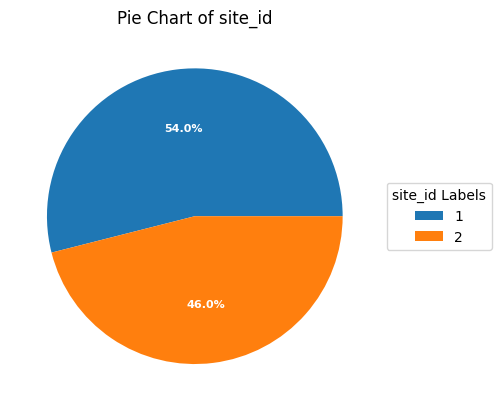

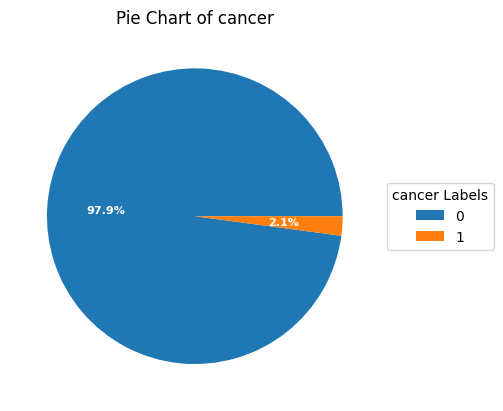

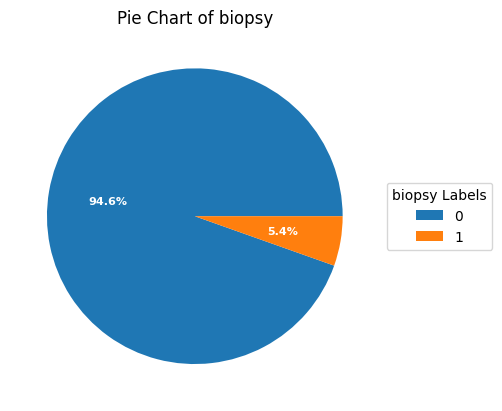

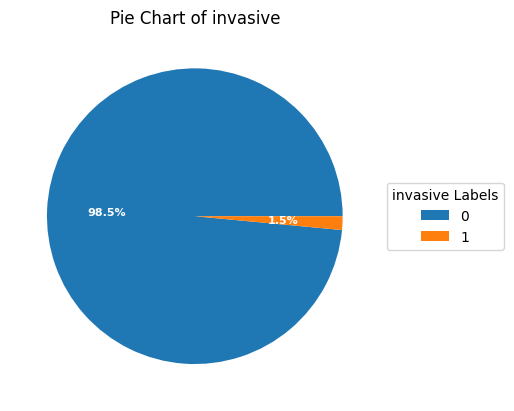

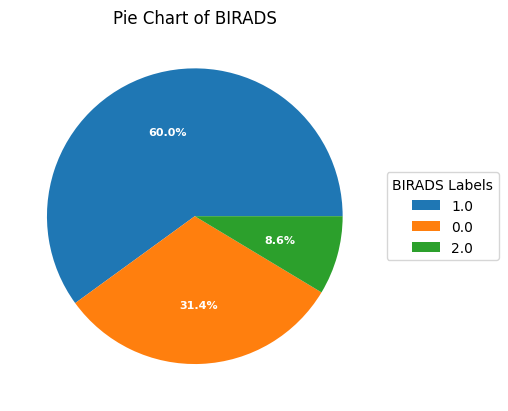

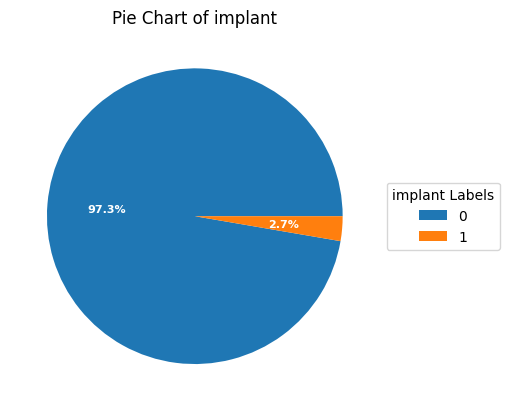

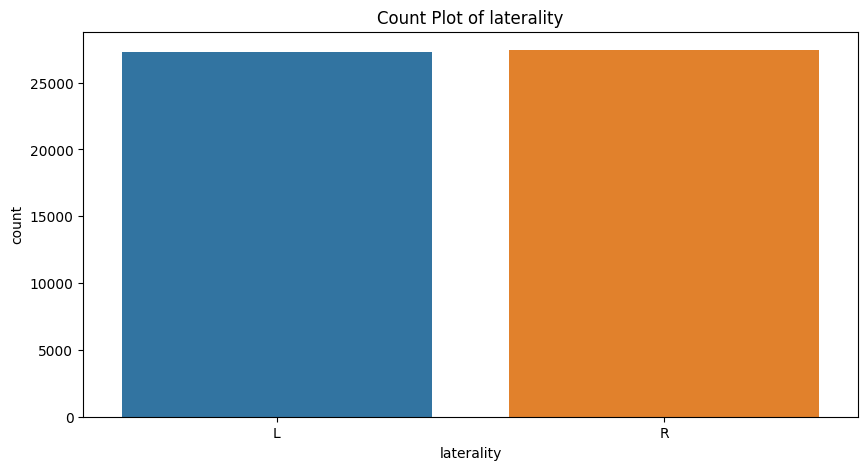

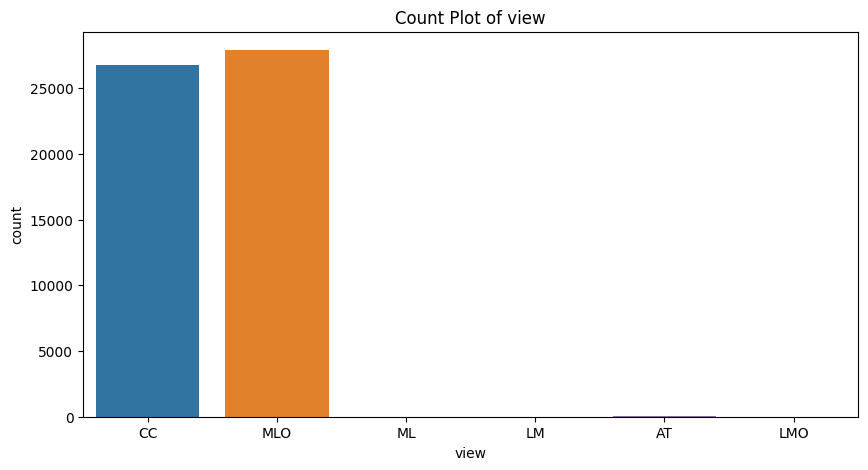

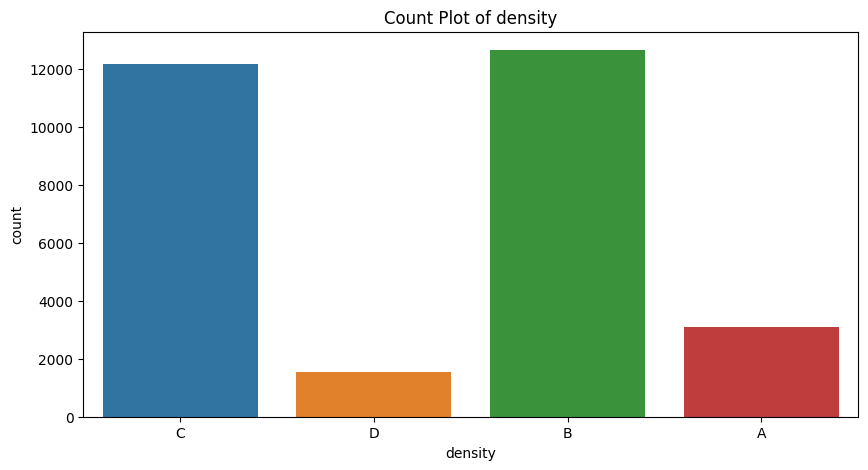

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Print the type of each column and create distribution plots for categorical variables
numerical_categorical_cols = []
textual_categorical_cols = []
for col_name, col_data in df.iteritems():
    col_type = identify_type(col_data)
    #print(f"{col_name}: {col_type}")

    if col_type == 'numerical_categorical':
        numerical_categorical_cols.append(col_name)
    elif col_type == 'textual_categorical':
        textual_categorical_cols.append(col_name)

# Plot pie charts for numerical_categorical variables
for col_name in numerical_categorical_cols:
    counts = df[col_name].value_counts()
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(counts, autopct='%1.1f%%', textprops=dict(color="w"))
    ax.legend(wedges, counts.index, title=f'{col_name} Labels', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=8, weight='bold')
    ax.set_title(f'Pie Chart of {col_name}')
    plt.show()

# Plot count plots for textual_categorical variables
for col_name in textual_categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col_name)
    plt.title(f'Count Plot of {col_name}')
    plt.show()

# EDA

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

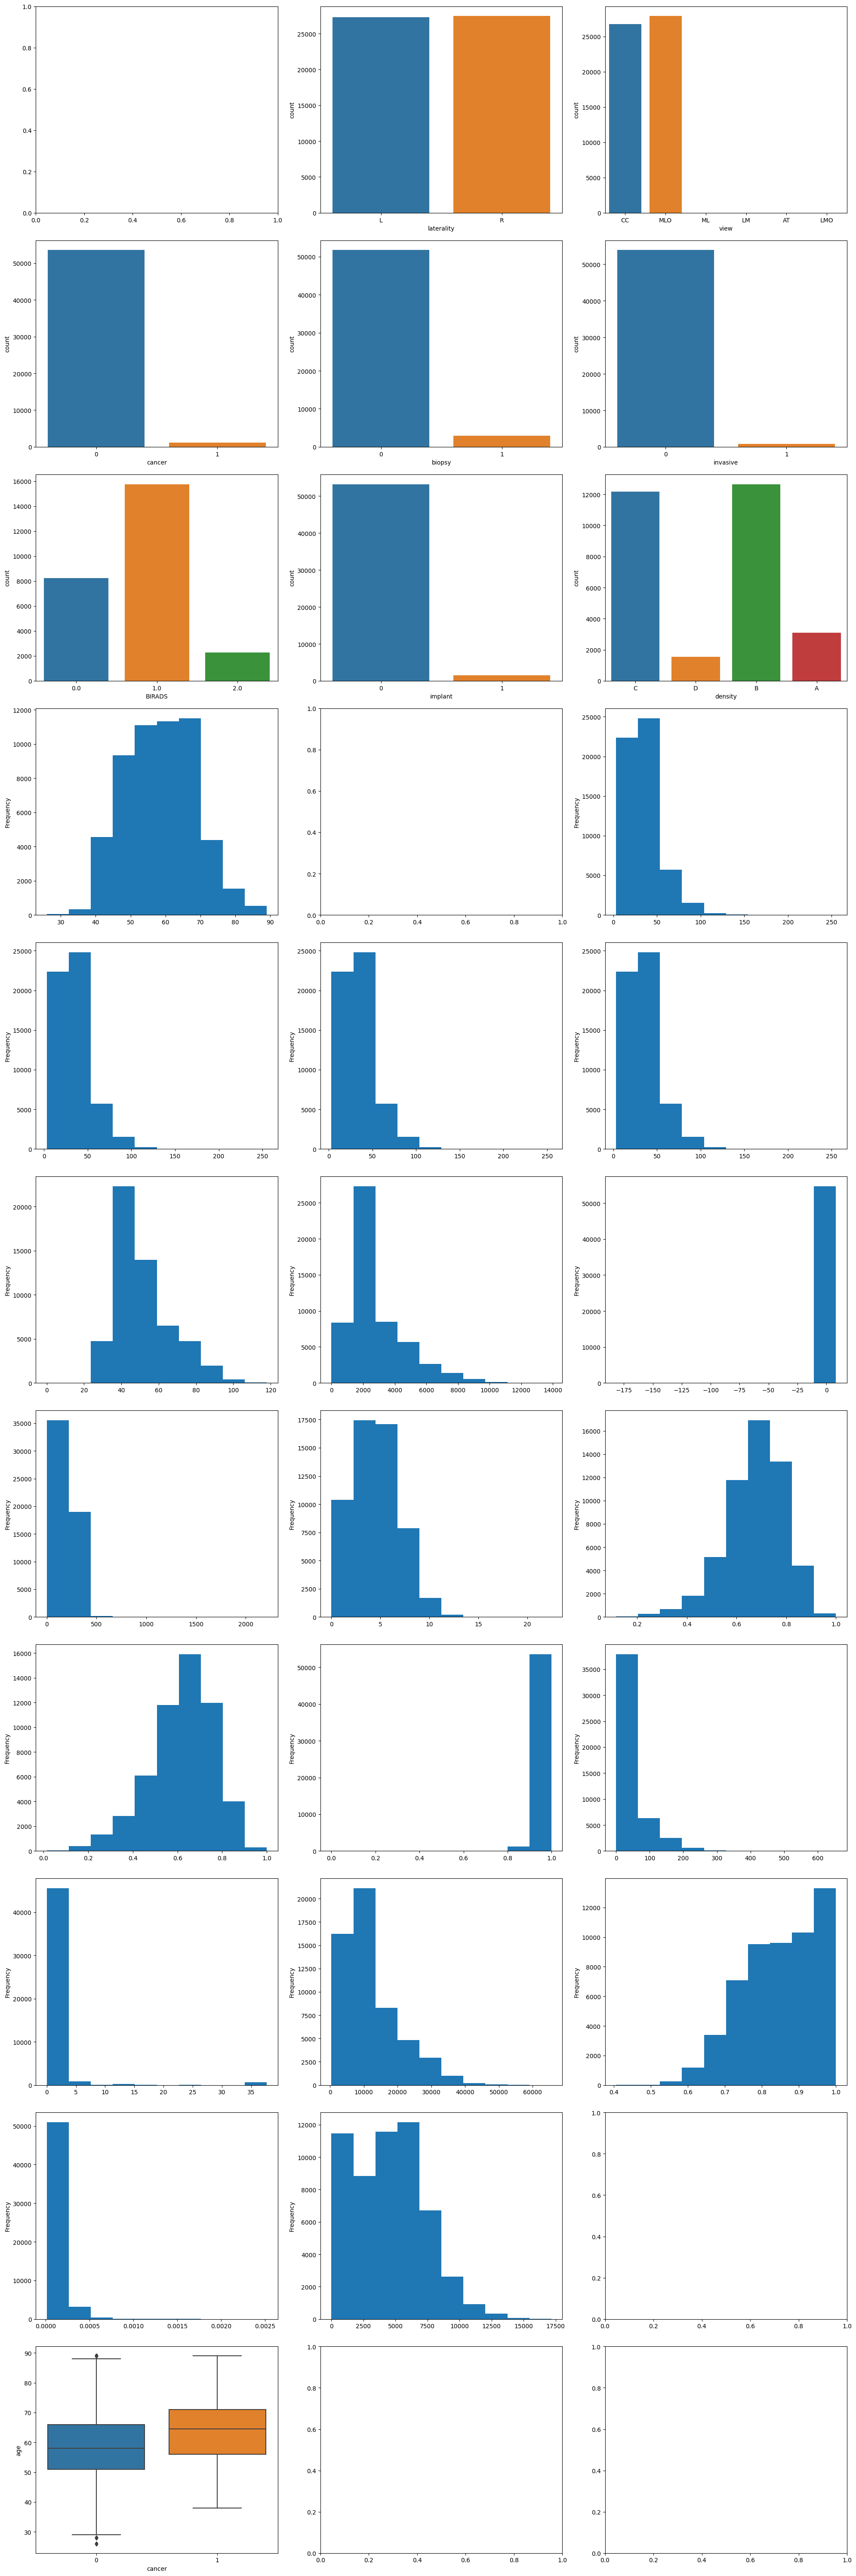

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes for subplots
fig, axes = plt.subplots(11, 3, figsize=(20, 60))

# Bar plots for categorical variables
#sns.countplot(x='site_id', data=df, ax=axes[0, 0])
sns.countplot(x='laterality', data=df, ax=axes[0, 1])
sns.countplot(x='view', data=df, ax=axes[0, 2])
sns.countplot(x='cancer', data=df, ax=axes[1, 0])
sns.countplot(x='biopsy', data=df, ax=axes[1, 1])
sns.countplot(x='invasive', data=df, ax=axes[1, 2])
sns.countplot(x='BIRADS', data=df, ax=axes[2, 0])
sns.countplot(x='implant', data=df, ax=axes[2, 1])
sns.countplot(x='density', data=df, ax=axes[2, 2])

# Histograms for continuous variables
df['age'].plot(kind='hist', ax=axes[3, 0])
#df['machine_id'].plot(kind='hist', ax=axes[3, 1])
df['color_intensity_r'].plot(kind='hist', ax=axes[3, 2])
df['color_intensity_g'].plot(kind='hist', ax=axes[4, 0])
df['color_intensity_b'].plot(kind='hist', ax=axes[4, 1])
df['mean_pixel_value'].plot(kind='hist', ax=axes[4, 2])
df['std_pixel_value'].plot(kind='hist', ax=axes[5, 0])
df['variance'].plot(kind='hist', ax=axes[5, 1])
df['skewness'].plot(kind='hist', ax=axes[5, 2])
df['contrast'].plot(kind='hist', ax=axes[6, 0])
df['dissimilarity'].plot(kind='hist', ax=axes[6, 1])
df['homogeneity'].plot(kind='hist', ax=axes[6, 2])
df['energy'].plot(kind='hist', ax=axes[7, 0])
df['correlation'].plot(kind='hist', ax=axes[7, 1])
df['compactness'].plot(kind='hist', ax=axes[7, 2])
df['circularity'].plot(kind='hist', ax=axes[8, 0])
df['mean_microcalcification_size'].plot(kind='hist', ax=axes[8, 1])
df['mean_microcalcification_solidity'].plot(kind='hist', ax=axes[8, 2])
df['microcalcification_clustering'].plot(kind='hist', ax=axes[9, 0])
df['edge_count'].plot(kind='hist', ax=axes[9, 1])

# Box plots for continuous variables by cancer
sns.boxplot(x='cancer', y='age', data=df, ax=axes[10, 0])
#sns.boxplot(x='cancer', y='machine_id', data=df, ax=axes[10, 1])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt


<ipython-input-12-5cd62ae3909b>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


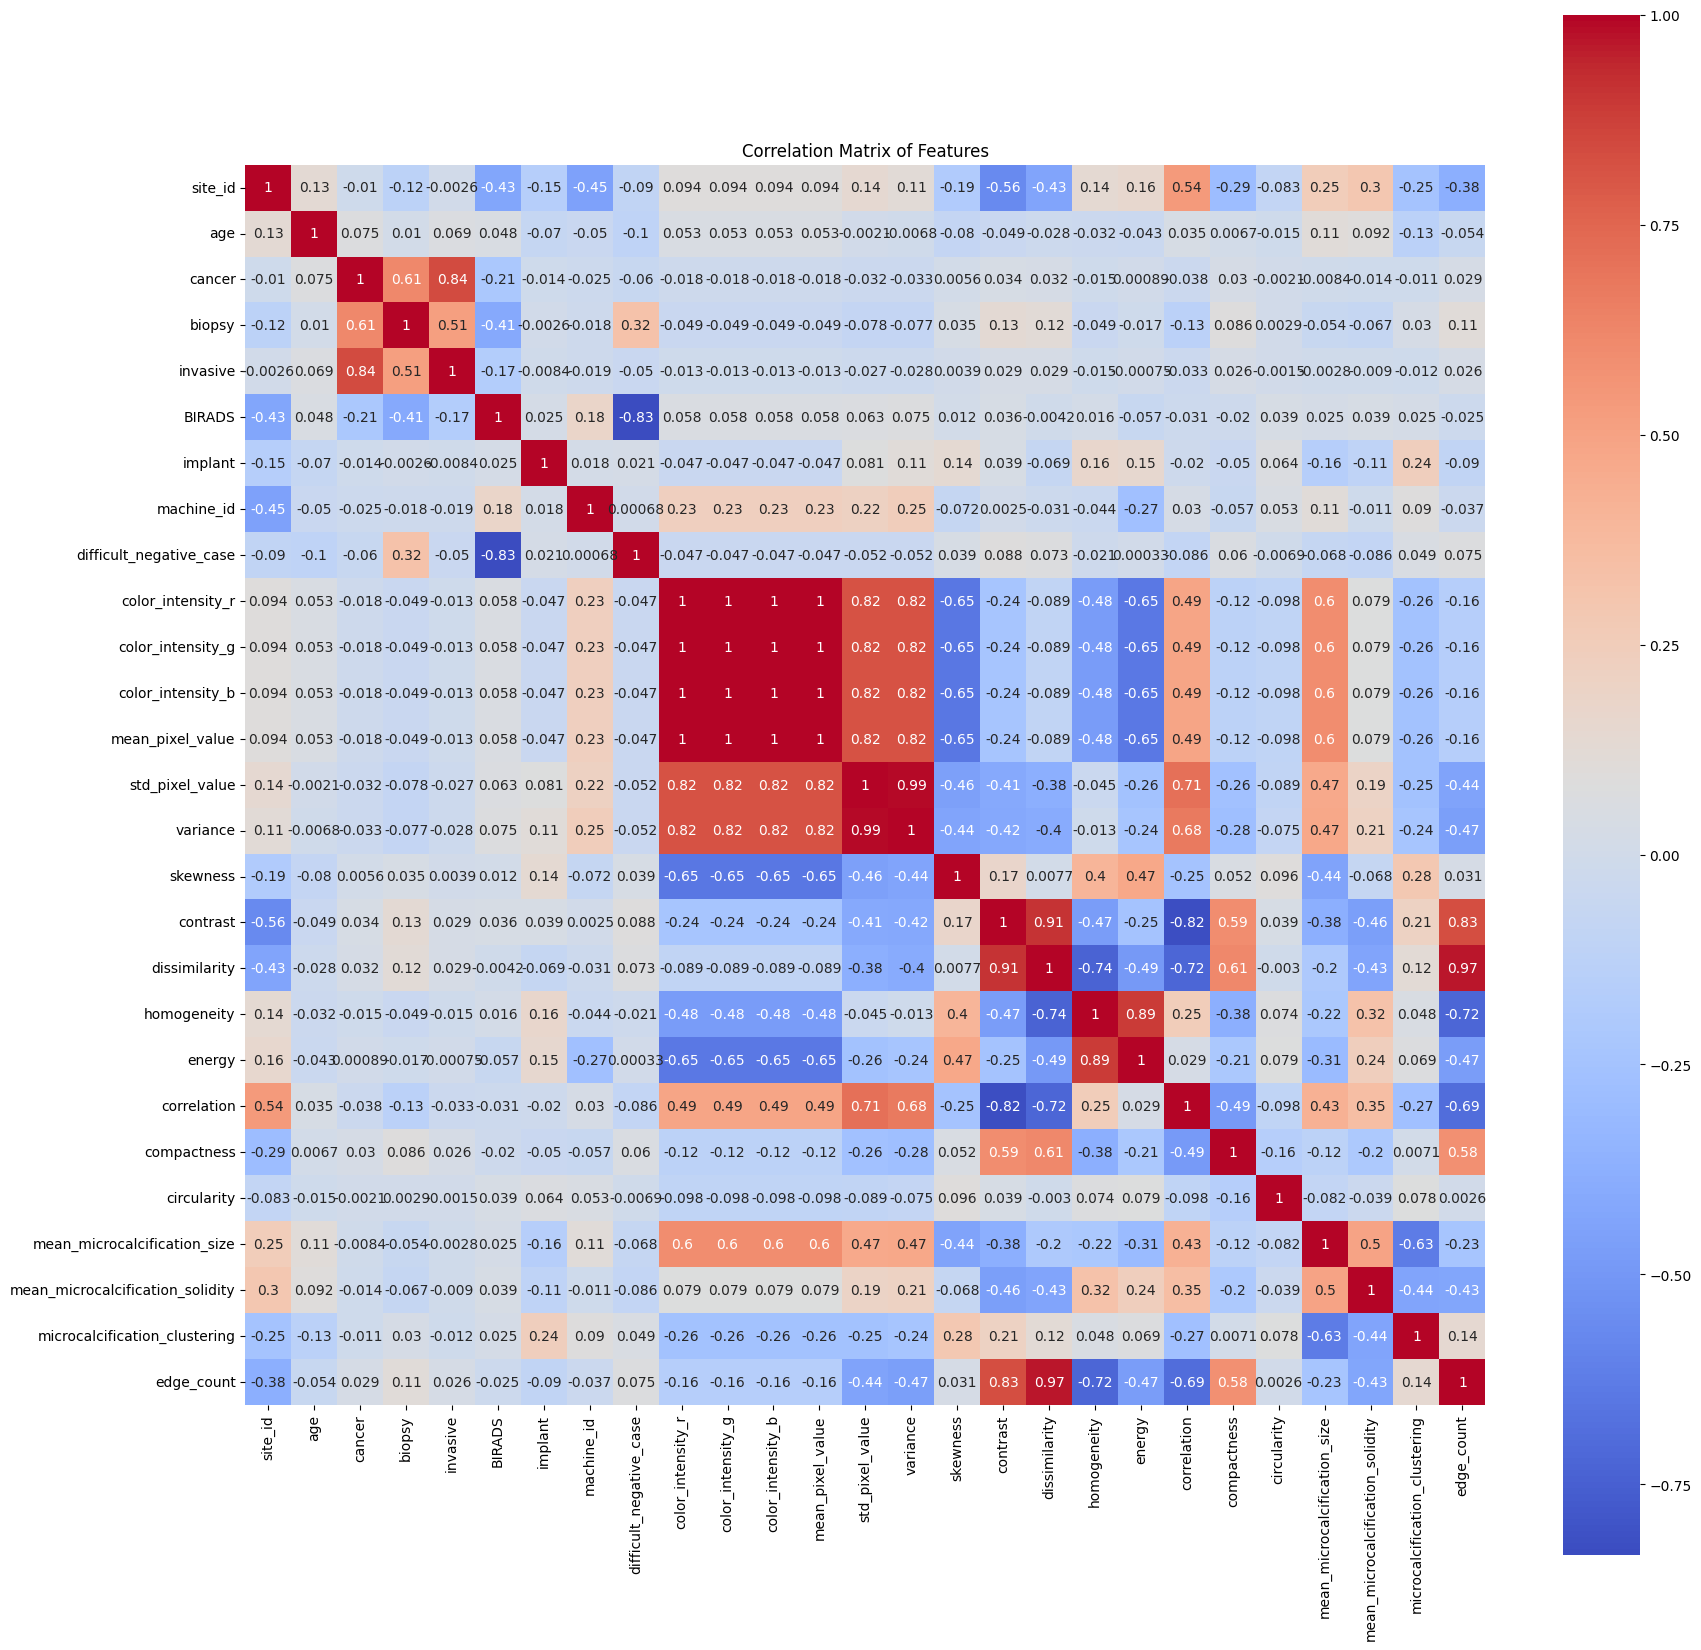

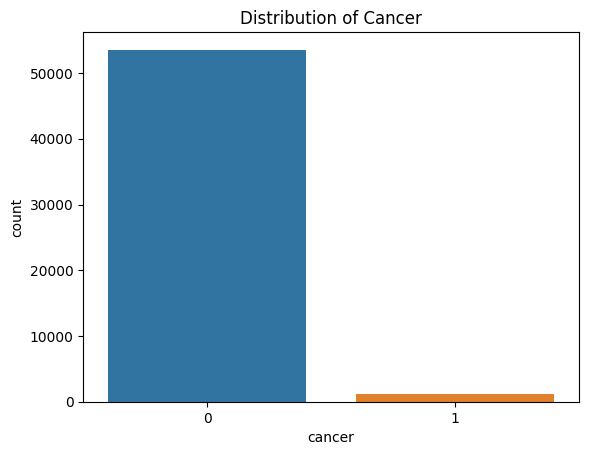

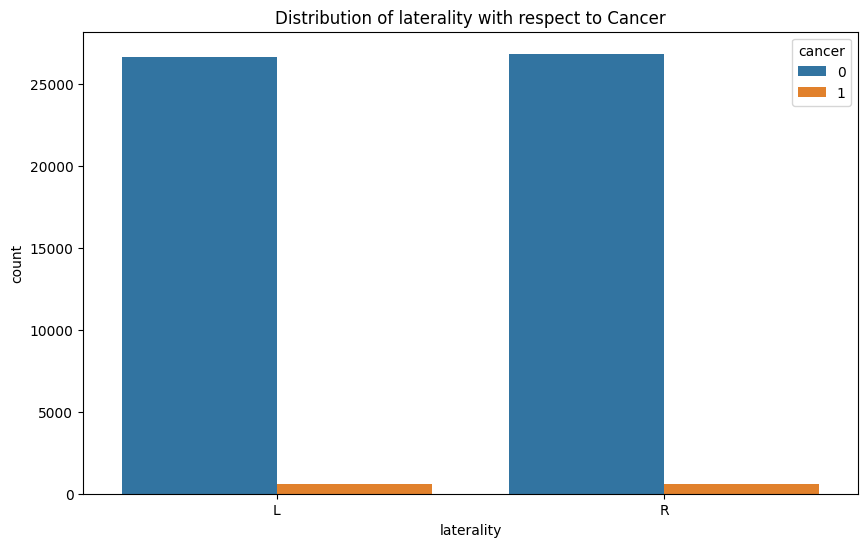

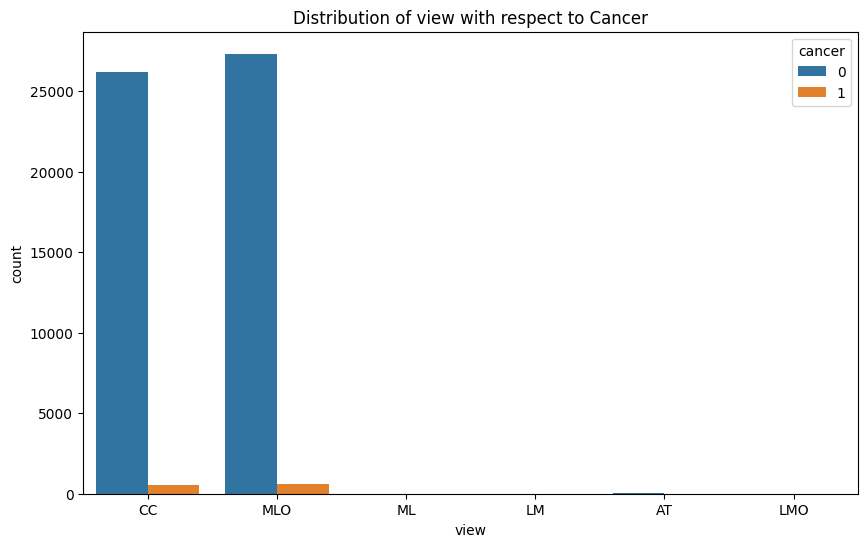

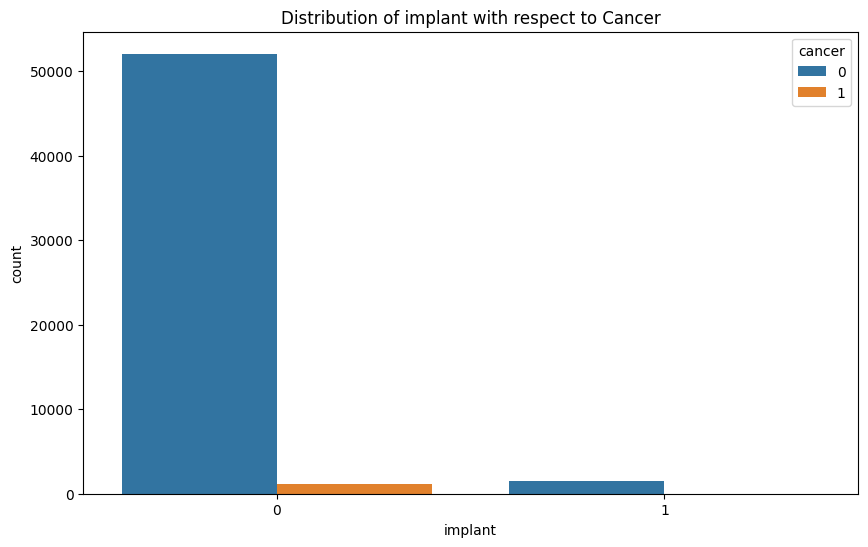

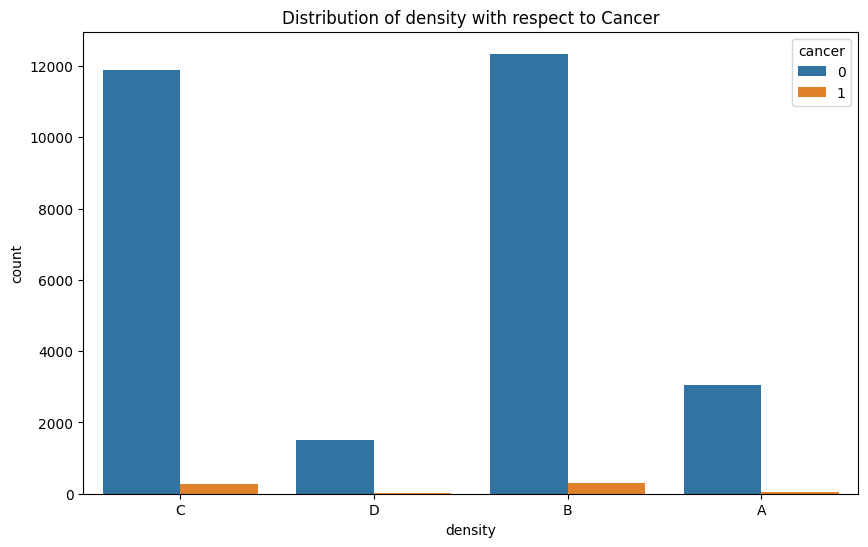

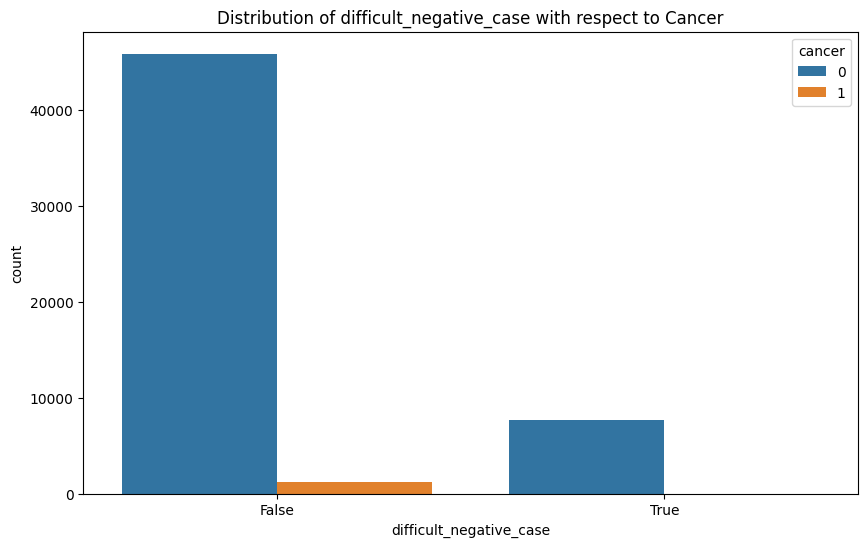

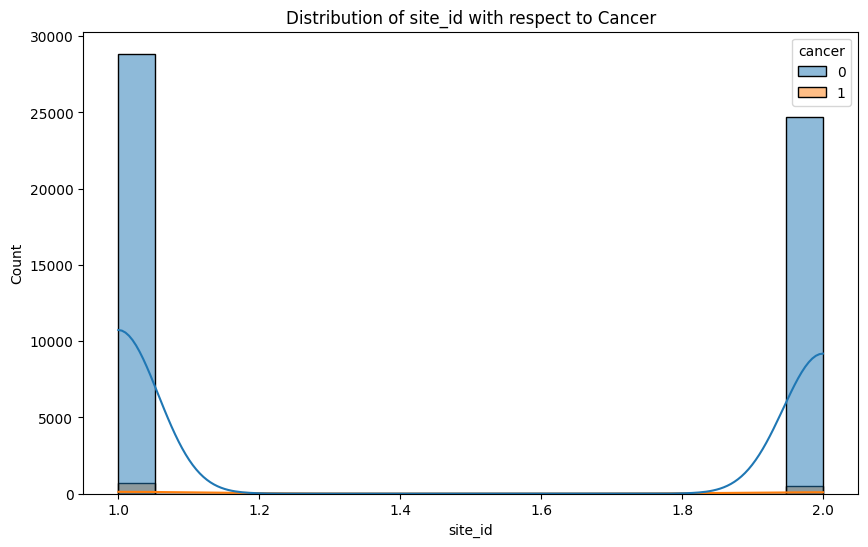

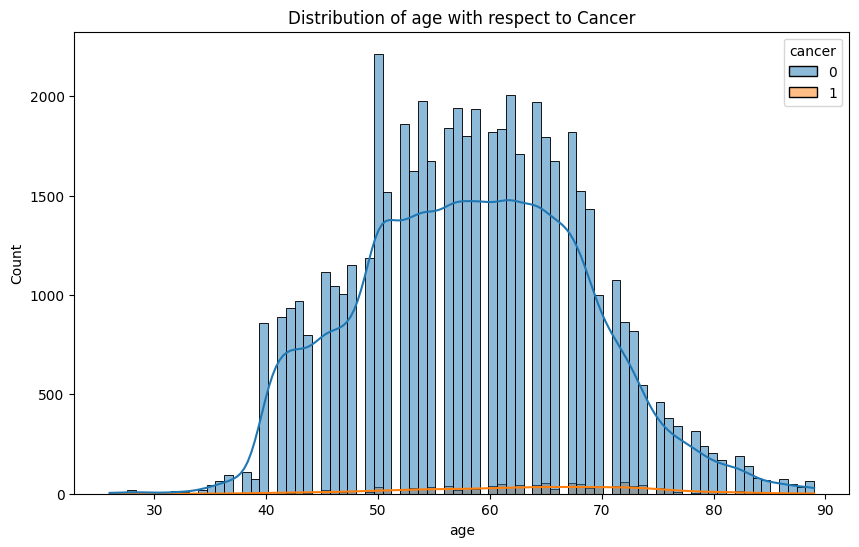

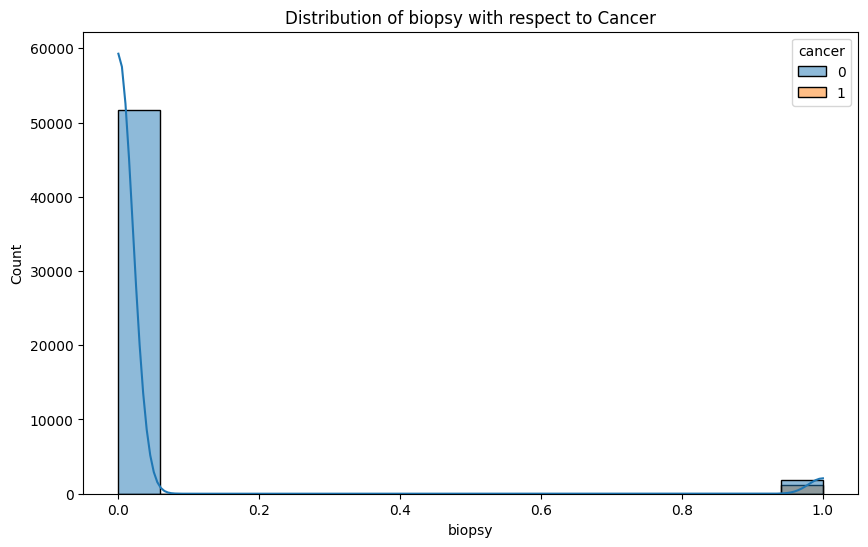

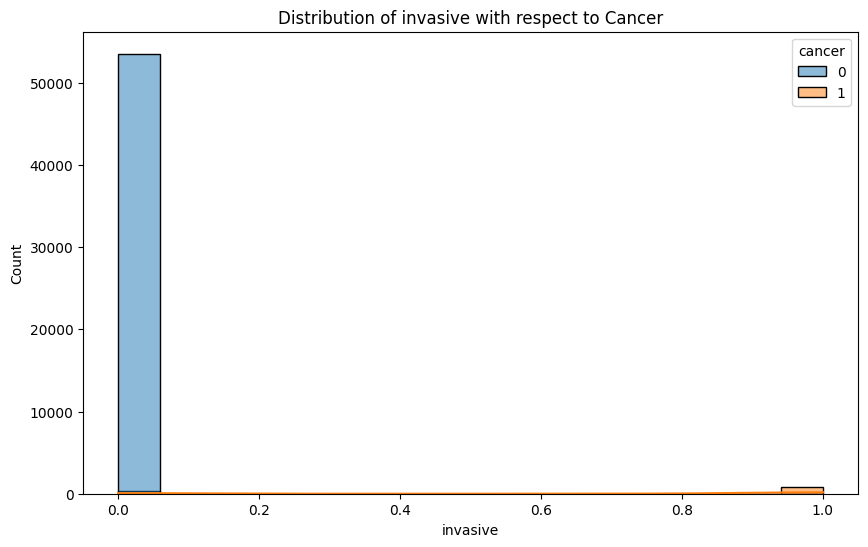

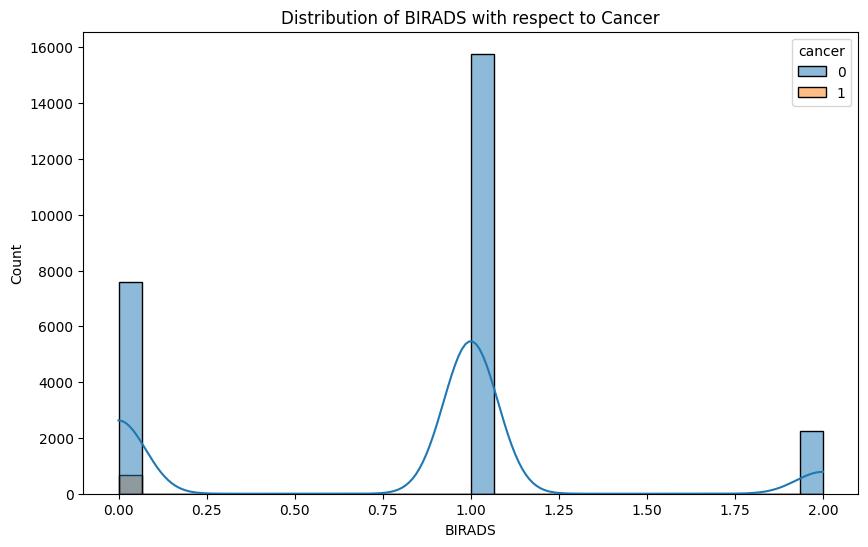

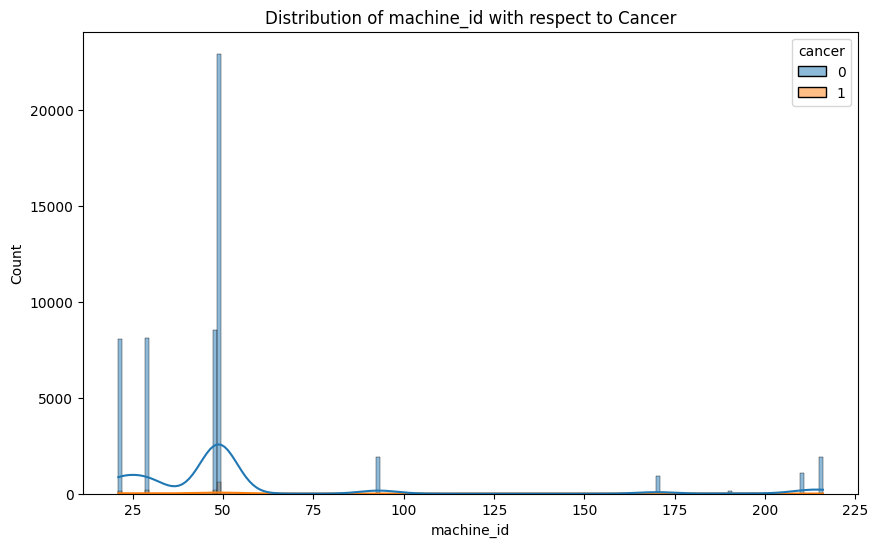

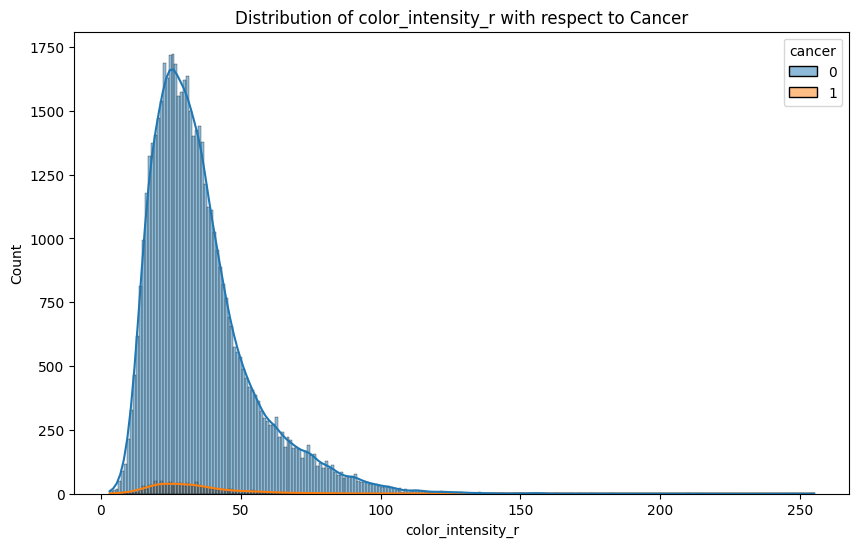

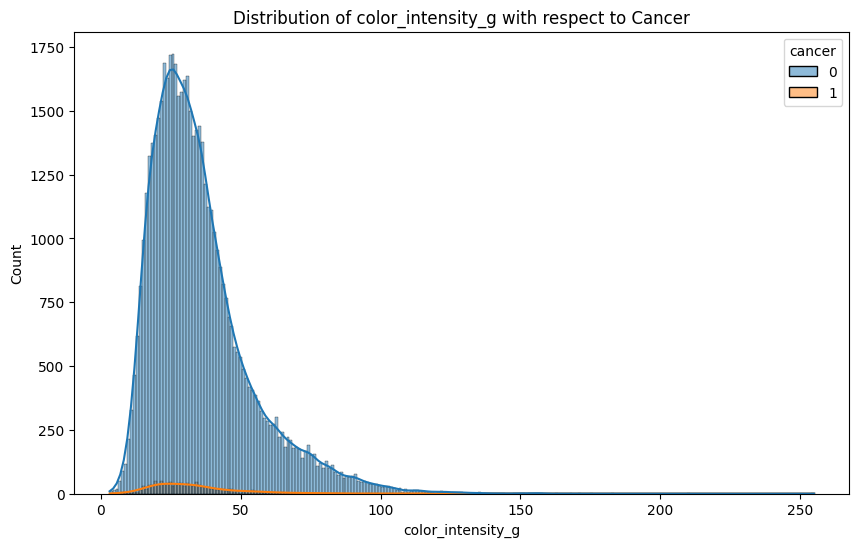

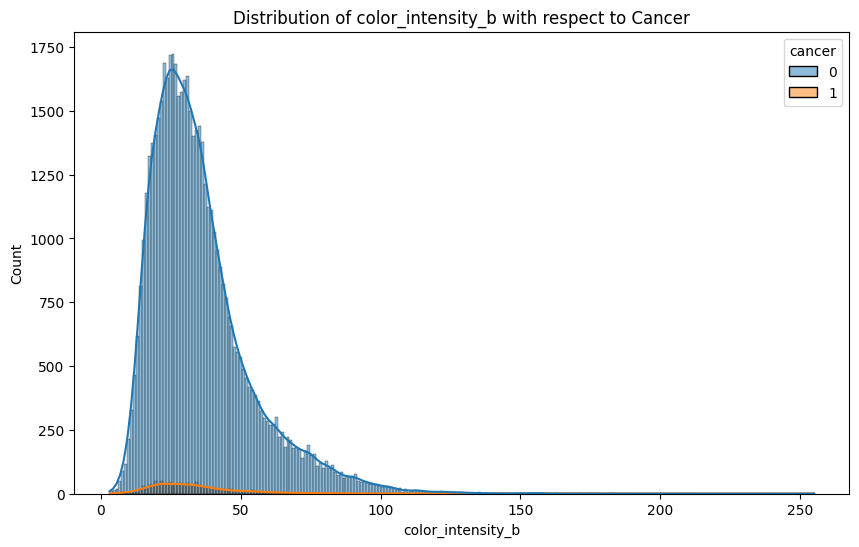

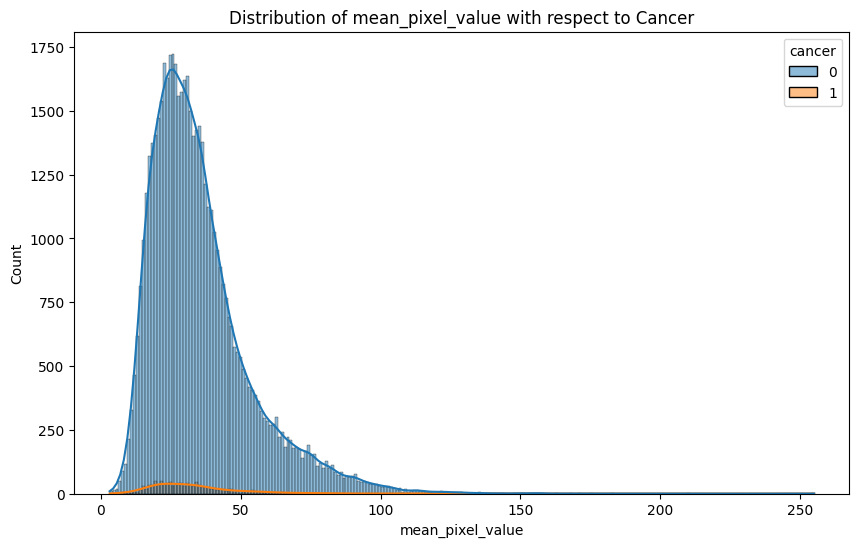

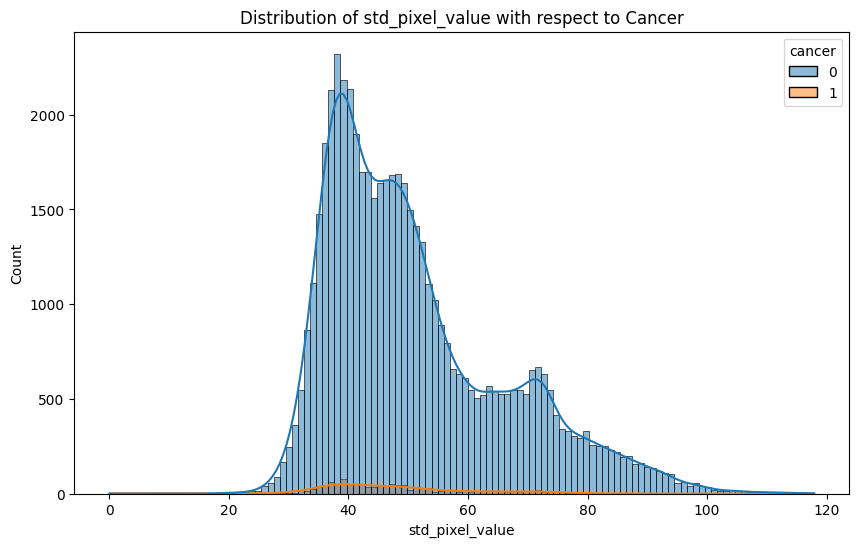

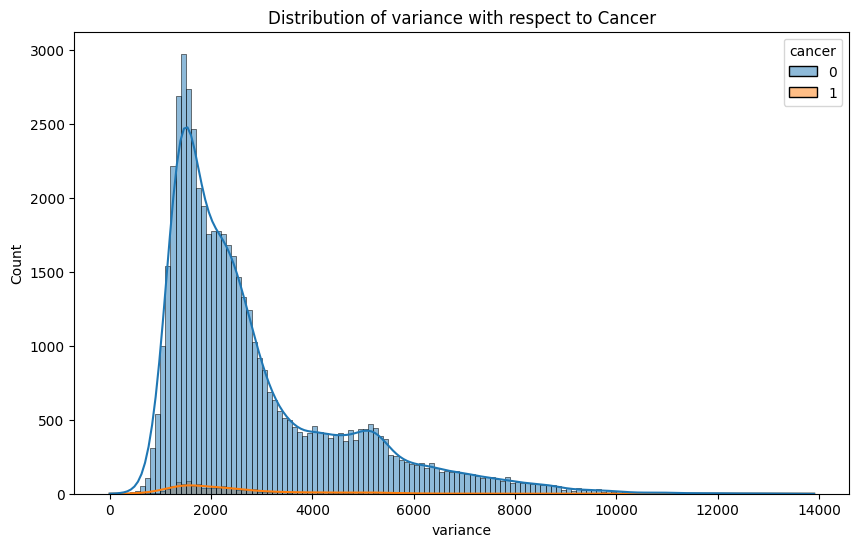

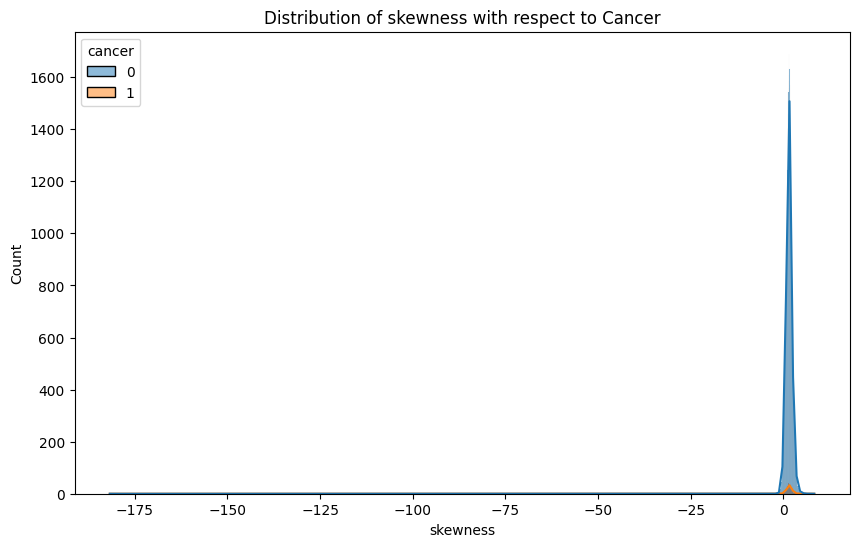

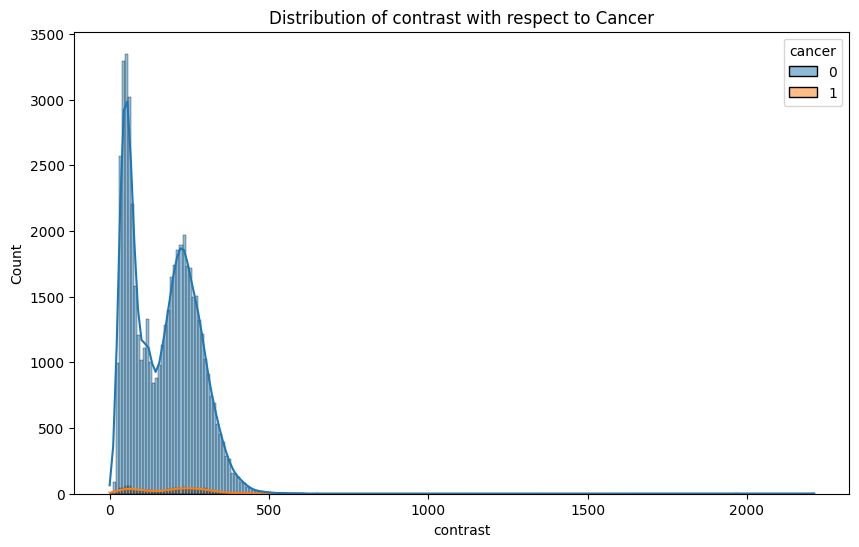

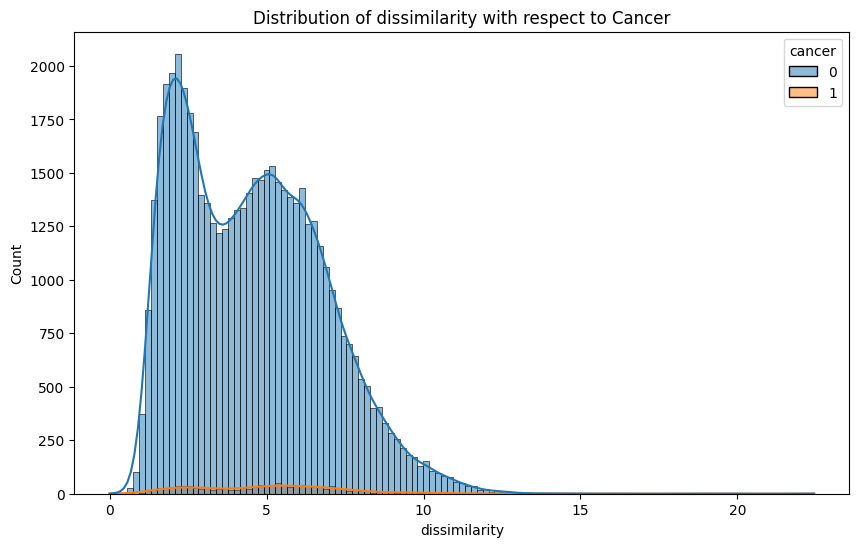

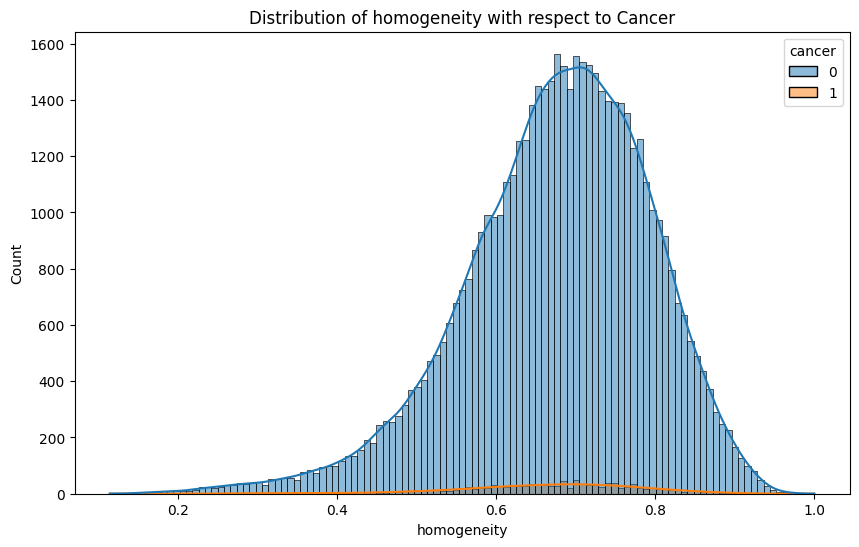

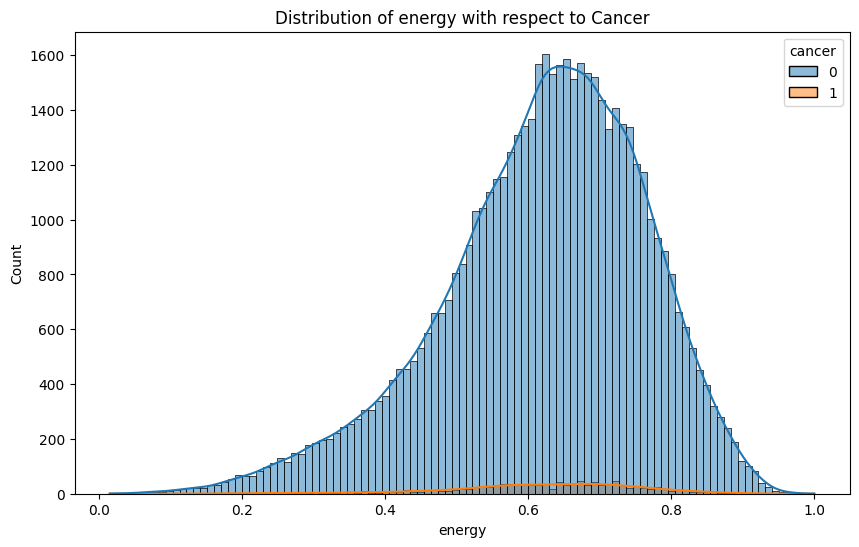

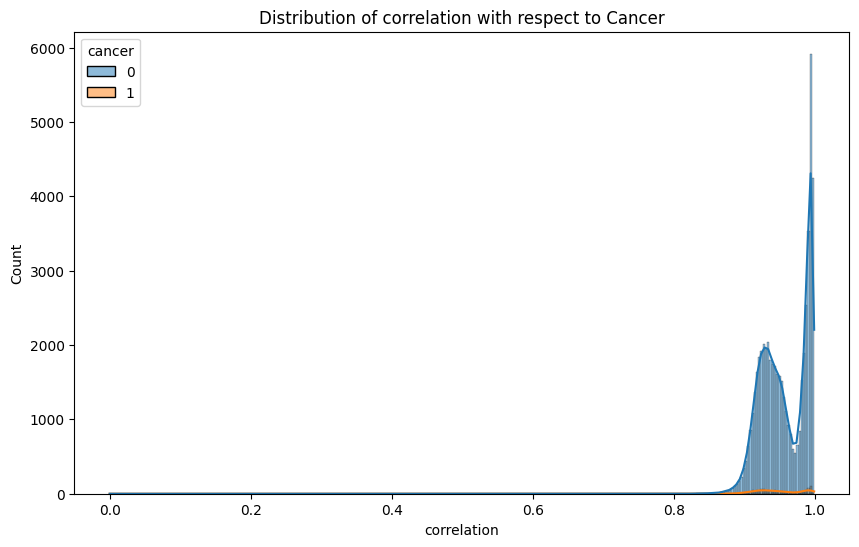

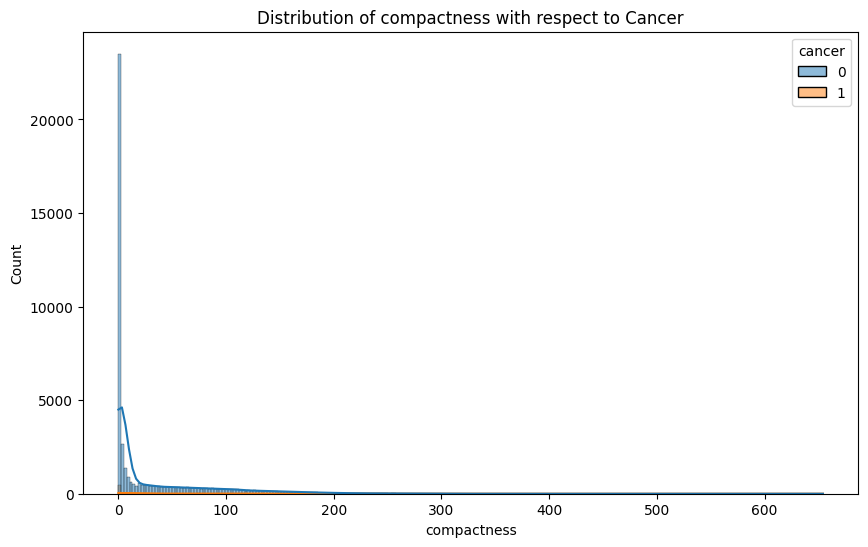

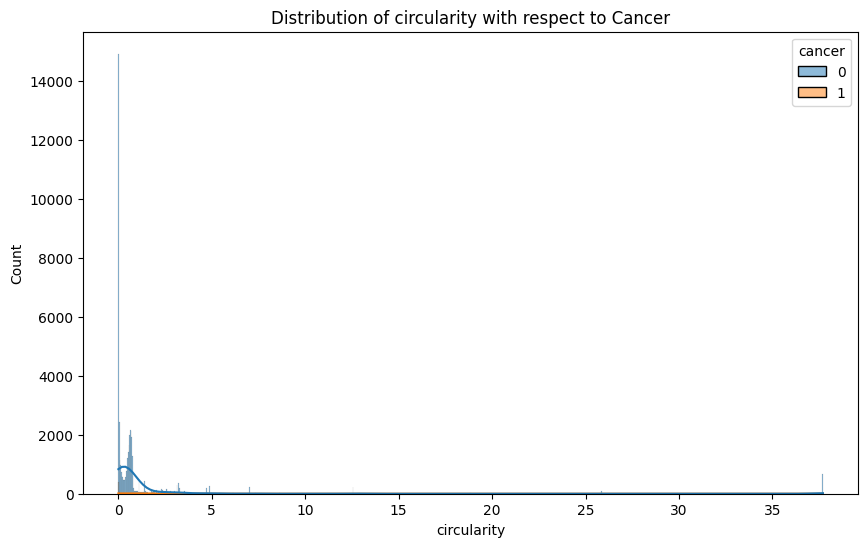

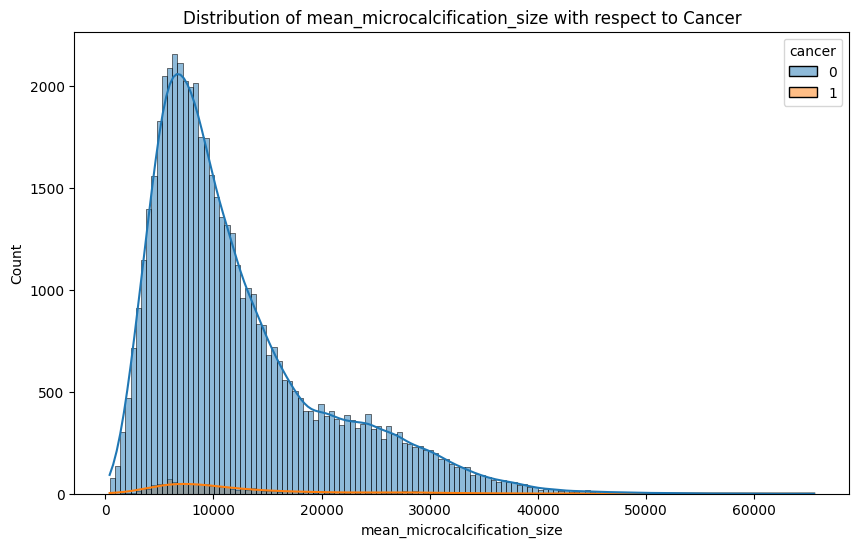

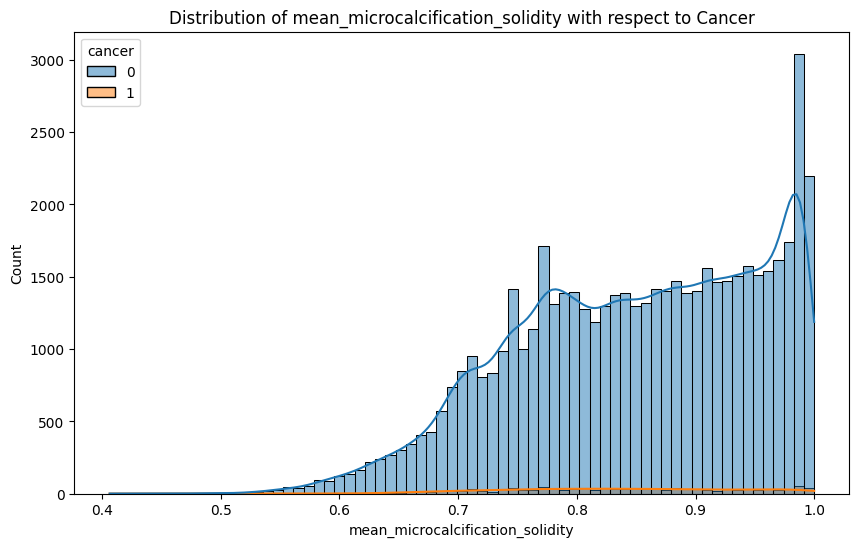

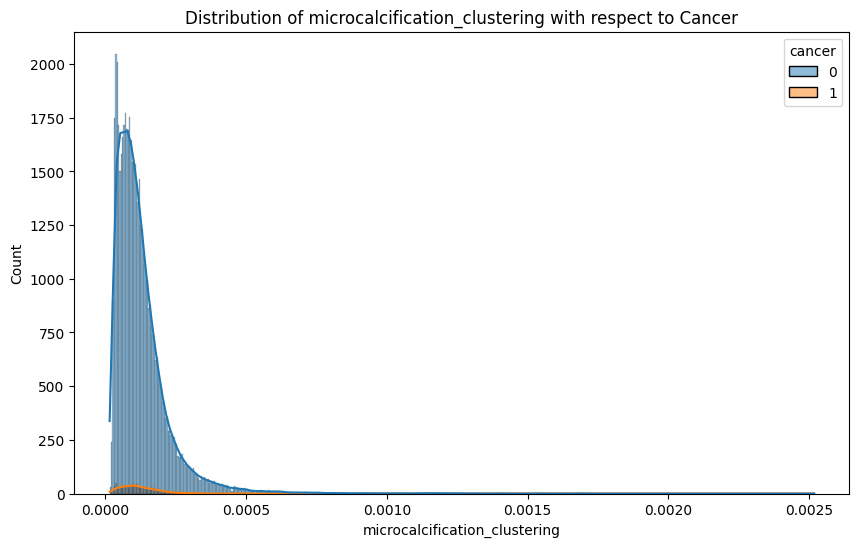

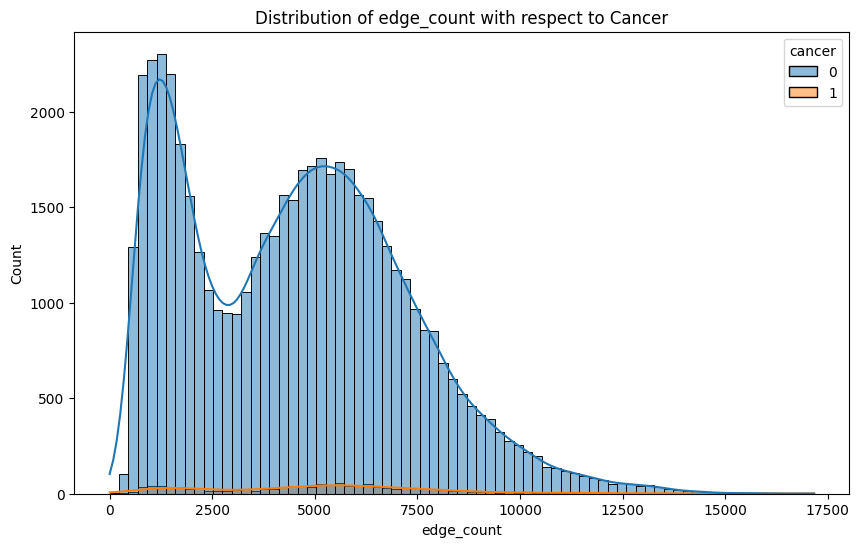

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is the DataFrame with all the features

# Compute the correlation matrix between the features
correlation_matrix = merged_df.corr()

# Plot the correlation matrix with a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Features")
plt.show()

# Plot the distribution of the target variable 'cancer'
sns.countplot(x="cancer", data=merged_df)
plt.title("Distribution of Cancer")
plt.show()

# Plot the distribution of the categorical variables with respect to 'cancer'
categorical_features = ['laterality', 'view', 'implant', 'density', 'difficult_negative_case']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=merged_df, hue="cancer")
    plt.title(f"Distribution of {feature} with respect to Cancer")
    plt.show()

# Plot the distribution of the continuous variables with respect to 'cancer'
continuous_features = [col for col in merged_df.columns if col not in categorical_features + ['cancer']]

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=merged_df, x=feature, hue="cancer", kde=True)
    plt.title(f"Distribution of {feature} with respect to Cancer")
    plt.show()

# Handle NAN values
This code uses K-Nearest Neighbors (KNN) imputation for both continuous and categorical columns. Note that KNN imputation is a more computationally expensive method than simple imputations like mean, median, or mode, and its performance may depend on the specific characteristics of the data. Make sure to validate the performance of KNN imputation on your dataset before using it in a production setting.

In [ ]:
# missing / Nan values BEFORE imputation
print(df.isna().sum())

site_id                                 0
laterality                              0
view                                    0
age                                    37
cancer                                  0
biopsy                                  0
invasive                                0
BIRADS                              28420
implant                                 0
density                             25236
machine_id                              0
difficult_negative_case                 0
color_intensity_r                       0
color_intensity_g                       0
color_intensity_b                       0
mean_pixel_value                        0
std_pixel_value                         0
variance                                0
skewness                                0
contrast                                0
dissimilarity                           0
homogeneity                             0
energy                                  0
correlation                       

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Function to perform KNN imputation for categorical columns
def knn_impute_categorical(df, column, knn_imputer):
    column_encoded = pd.get_dummies(df[column])
    column_imputed = knn_imputer.fit_transform(column_encoded)
    column_imputed_df = pd.DataFrame(column_imputed, columns=column_encoded.columns)
    return column_imputed_df.idxmax(axis=1)

# Function to perform KNN imputation for continuous columns
def knn_impute_continuous(df, column, knn_imputer):
    column_imputed = knn_imputer.fit_transform(df[column].values.reshape(-1, 1))
    return np.round(column_imputed).reshape(-1)

# Set up KNN imputer
knn_imputer = KNNImputer(n_neighbors=3, weights='distance')

# Iterate through columns and apply KNN imputation
for col in df.columns:
    if col in ['cancer', 'biopsy', 'invasive', 'BIRADS', 'implant']:
        df[col] = knn_impute_categorical(df, col, knn_imputer)
    elif col in ['age', 'color_intensity_r', 'color_intensity_g', 'color_intensity_b', 'mean_pixel_value', 'std_pixel_value', 'variance', 'skewness', 'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'compactness', 'circularity', 'mean_microcalcification_size', 'mean_microcalcification_solidity', 'microcalcification_clustering', 'edge_count']:
        df[col] = knn_impute_continuous(df, col, knn_imputer).flatten()
    elif col in ['laterality', 'view', 'density', 'difficult_negative_case']:
        df[col] = knn_impute_categorical(df, col, knn_imputer)

# Check if there are any remaining missing values
print(df.isna().sum())

site_id                             0
laterality                          0
view                                0
age                                 0
cancer                              0
biopsy                              0
invasive                            0
BIRADS                              0
implant                             0
density                             0
machine_id                          0
difficult_negative_case             0
color_intensity_r                   0
color_intensity_g                   0
color_intensity_b                   0
mean_pixel_value                    0
std_pixel_value                     0
variance                            0
skewness                            0
contrast                            0
dissimilarity                       0
homogeneity                         0
energy                              0
correlation                         0
compactness                         0
circularity                         0
mean_microca

In [ ]:
# Save the scaled DataFrame as a CSV file
df.to_csv('df_imputed.csv', index=False)



,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,...,dissimilarity,homogeneity,energy,correlation,compactness,circularity,mean_microcalcification_size,mean_microcalcification_solidity,microcalcification_clustering,edge_count
0,2,L,CC,61.0,0,0,0,0.0,0,A,...,2.0,1.0,1.0,1.0,27.0,0.0,3660.0,1.0,0.0,1612.0
1,2,L,MLO,61.0,0,0,0,0.0,0,A,...,3.0,1.0,1.0,1.0,3.0,0.0,6146.0,1.0,0.0,2207.0
2,2,R,MLO,61.0,0,0,0,0.0,0,A,...,3.0,1.0,1.0,1.0,29.0,0.0,3792.0,1.0,0.0,1836.0
3,2,R,CC,61.0,0,0,0,0.0,0,A,...,2.0,1.0,1.0,1.0,27.0,0.0,3203.0,1.0,0.0,1574.0
4,2,L,CC,55.0,0,0,0,0.0,0,A,...,3.0,1.0,1.0,1.0,33.0,1.0,4281.0,1.0,0.0,3630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,R,MLO,43.0,0,0,0,1.0,0,C,...,10.0,0.0,0.0,1.0,243.0,0.0,10818.0,1.0,0.0,10985.0
54702,1,L,MLO,60.0,0,0,0,0.0,0,C,...,2.0,1.0,1.0,1.0,2.0,1.0,22924.0,1.0,0.0,856.0
54703,1,L,CC,60.0,0,0,0,0.0,0,C,...,1.0,1.0,0.0,1.0,1.0,1.0,13751.0,1.0,0.0,522.0
54704,1,R,MLO,60.0,0,0,0,0.0,0,C,...,2.0,1.0,0.0,1.0,2.0,1.0,25344.0,1.0,0.0,805.0


In [ ]:
import pandas as pd
# Read the CSV file back as a DataFrame
df_imputed = pd.read_csv('df_imputed.csv')

# Display the first 5 rows of the DataFrame
df_imputed

,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,...,dissimilarity,homogeneity,energy,correlation,compactness,circularity,mean_microcalcification_size,mean_microcalcification_solidity,microcalcification_clustering,edge_count
0,2,0,1,0.555556,0,0,0,0.0,0,0,...,0.090909,1.0,1.0,1.0,0.041284,0.000000,0.050093,1.0,0.0,0.093879
1,2,0,5,0.555556,0,0,0,0.0,0,0,...,0.136364,1.0,1.0,1.0,0.004587,0.000000,0.088257,1.0,0.0,0.128531
2,2,1,5,0.555556,0,0,0,0.0,0,0,...,0.136364,1.0,1.0,1.0,0.044343,0.000000,0.052119,1.0,0.0,0.106924
3,2,1,1,0.555556,0,0,0,0.0,0,0,...,0.090909,1.0,1.0,1.0,0.041284,0.000000,0.043077,1.0,0.0,0.091666
4,2,0,1,0.460317,0,0,0,0.0,0,0,...,0.136364,1.0,1.0,1.0,0.050459,0.026316,0.059626,1.0,0.0,0.211403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,1,5,0.269841,0,0,0,1.0,0,2,...,0.454545,0.0,0.0,1.0,0.371560,0.000000,0.159981,1.0,0.0,0.639741
54702,1,0,5,0.539683,0,0,0,0.0,0,2,...,0.090909,1.0,1.0,1.0,0.003058,0.026316,0.345830,1.0,0.0,0.049851
54703,1,0,1,0.539683,0,0,0,0.0,0,2,...,0.045455,1.0,0.0,1.0,0.001529,0.026316,0.205008,1.0,0.0,0.030400
54704,1,1,5,0.539683,0,0,0,0.0,0,2,...,0.090909,1.0,0.0,1.0,0.003058,0.026316,0.382981,1.0,0.0,0.046881


# Label Encoding

In [ ]:
# Display Dataframe AFTER Encoding DataFrame

# Data Scaling

In [ ]:
# # 5 model training

# MODEL TRAINING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, cohen_kappa_score, matthews_corrcoef, log_loss

# Read the dataset
df = df_imputed

In [ ]:
# Preprocessing
laterality_encoder = LabelEncoder()
view_encoder = LabelEncoder()
density_encoder = LabelEncoder()
difficult_negative_case_encoder = LabelEncoder()

df['laterality'] = laterality_encoder.fit_transform(df['laterality'].astype(str))
df['view'] = view_encoder.fit_transform(df['view'].astype(str))
df['density'] = density_encoder.fit_transform(df['density'].astype(str))
df['difficult_negative_case'] = difficult_negative_case_encoder.fit_transform(df['difficult_negative_case'].astype(str))

# Scaling continuous features
continuous_features = ['age', 'color_intensity_r', 'color_intensity_g', 'color_intensity_b', 'mean_pixel_value', 'std_pixel_value', 'variance', 'skewness', 'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'compactness', 'circularity', 'mean_microcalcification_size', 'mean_microcalcification_solidity', 'microcalcification_clustering', 'edge_count']
minmax_scaler = MinMaxScaler()
scaled_data_minmax = minmax_scaler.fit_transform(df[continuous_features])
scaled_df_minmax = pd.DataFrame(scaled_data_minmax, columns=continuous_features)
df[continuous_features] = scaled_df_minmax

In [ ]:
df

,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,...,dissimilarity,homogeneity,energy,correlation,compactness,circularity,mean_microcalcification_size,mean_microcalcification_solidity,microcalcification_clustering,edge_count
0,2,0,1,0.555556,0,0,0,0.0,0,0,...,0.090909,1.0,1.0,1.0,0.041284,0.000000,0.050093,1.0,0.0,0.093879
1,2,0,5,0.555556,0,0,0,0.0,0,0,...,0.136364,1.0,1.0,1.0,0.004587,0.000000,0.088257,1.0,0.0,0.128531
2,2,1,5,0.555556,0,0,0,0.0,0,0,...,0.136364,1.0,1.0,1.0,0.044343,0.000000,0.052119,1.0,0.0,0.106924
3,2,1,1,0.555556,0,0,0,0.0,0,0,...,0.090909,1.0,1.0,1.0,0.041284,0.000000,0.043077,1.0,0.0,0.091666
4,2,0,1,0.460317,0,0,0,0.0,0,0,...,0.136364,1.0,1.0,1.0,0.050459,0.026316,0.059626,1.0,0.0,0.211403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,1,5,0.269841,0,0,0,1.0,0,2,...,0.454545,0.0,0.0,1.0,0.371560,0.000000,0.159981,1.0,0.0,0.639741
54702,1,0,5,0.539683,0,0,0,0.0,0,2,...,0.090909,1.0,1.0,1.0,0.003058,0.026316,0.345830,1.0,0.0,0.049851
54703,1,0,1,0.539683,0,0,0,0.0,0,2,...,0.045455,1.0,0.0,1.0,0.001529,0.026316,0.205008,1.0,0.0,0.030400
54704,1,1,5,0.539683,0,0,0,0.0,0,2,...,0.090909,1.0,0.0,1.0,0.003058,0.026316,0.382981,1.0,0.0,0.046881


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


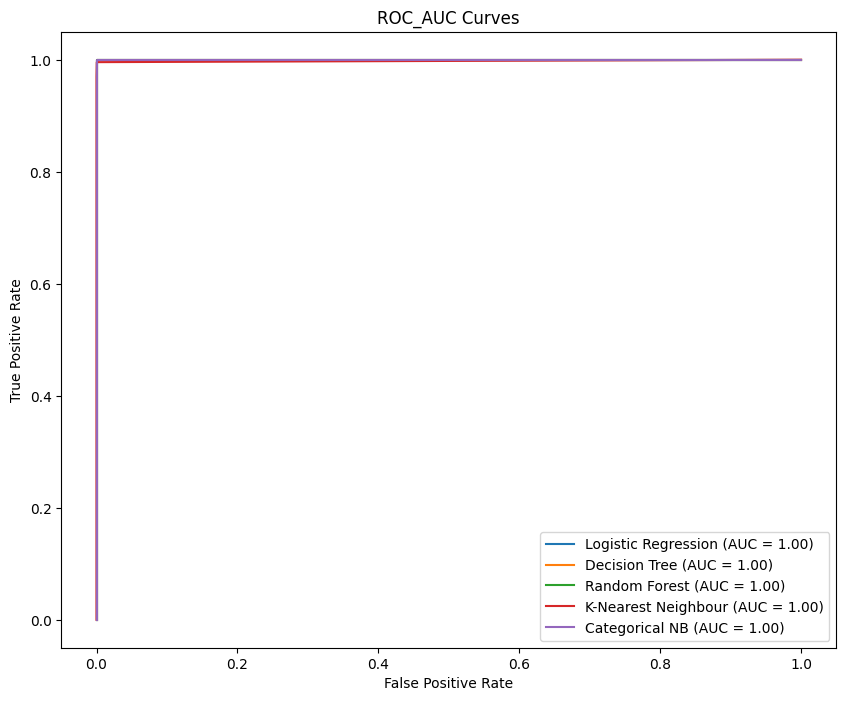

,name,accuracy,precision,recall,f1,roc_auc,confusion,cohen_kappa,matthews_corr,log_loss
0,Logistic Regression,1.000000,1.0,1.000000,1.000000,1.00000,"[[10711, 0], [0, 231]]",1.000000,1.000000,8.998780e-04
1,Decision Tree,1.000000,1.0,1.000000,1.000000,1.00000,"[[10711, 0], [0, 231]]",1.000000,1.000000,2.220446e-16
2,Random Forest,1.000000,1.0,1.000000,1.000000,1.00000,"[[10711, 0], [0, 231]]",1.000000,1.000000,3.226811e-03
3,K-Nearest Neighbour,0.998355,1.0,0.922078,0.959459,0.99783,"[[10711, 0], [18, 213]]",0.958621,0.959443,5.491112e-03
4,Categorical NB,0.993146,1.0,0.675325,0.806202,1.00000,"[[10711, 0], [75, 156]]",0.802846,0.818919,1.042191e-02


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score, matthews_corrcoef, log_loss, roc_curve
import matplotlib.pyplot as plt

# Train-test split
X = df.drop('cancer', axis=1)
y = df['cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train the 5 models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('K-Nearest Neighbour', KNeighborsClassifier()),
    ('Categorical NB', CategoricalNB())
]

model_metrics = []

plt.figure(figsize=(10, 8))

# Iterate through the models and fit each one
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    confusion = confusion_matrix(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    matthews_corr = matthews_corrcoef(y_test, y_pred)
    log_loss_score = log_loss(y_test, y_pred_proba)

    # Save performance metrics to model_metrics list
    metrics = {
        'name': name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion': confusion,
        'cohen_kappa': cohen_kappa,
        'matthews_corr': matthews_corr,
        'log_loss': log_loss_score
    }
    model_metrics.append(metrics)

    # Plot ROC_AUC curve for each model
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Finalize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curves')
plt.legend(loc='lower right')
plt.show()

# Convert the model_metrics list to a DataFrame
model_metrics_df = pd.DataFrame(model_metrics)

# Display the model_metrics DataFrame
model_metrics_df


In [ ]:
# Step 2: Find top 3 models
# You can assign weights to each performance metric and compute the weighted average score for each model
# For illustration, we assign equal weights to all metrics
weights = {
    'accuracy': 1,
    'precision': 1,
    'recall': 1,
    'f1': 1,
    'roc_auc': 1,
    'cohen_kappa': 1,
    'matthews_corr': 1,
    'log_loss': -1  # negative weight because lower log_loss is better
}

for metrics in model_metrics:
    weighted_score = 0
    for key, weight in weights.items():
        if key != 'confusion':
            weighted_score += metrics[key] * weight
    metrics['weighted_score'] = weighted_score

model_metrics.sort(key=lambda x: x['weighted_score'], reverse=True)
top3_models = model_metrics[:3]
top3_models

[{'name': 'Decision Tree',
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0,
  'roc_auc': 1.0,
  'confusion': array([[10711,     0],
         [    0,   231]]),
  'cohen_kappa': 1.0,
  'matthews_corr': 1.0,
  'log_loss': 2.2204460492503136e-16,
  'weighted_score': 7.0},
 {'name': 'Logistic Regression',
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0,
  'roc_auc': 1.0,
  'confusion': array([[10711,     0],
         [    0,   231]]),
  'cohen_kappa': 1.0,
  'matthews_corr': 1.0,
  'log_loss': 0.0008998780309315761,
  'weighted_score': 6.999100121969068},
 {'name': 'Random Forest',
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0,
  'roc_auc': 1.0,
  'confusion': array([[10711,     0],
         [    0,   231]]),
  'cohen_kappa': 1.0,
  'matthews_corr': 1.0,
  'log_loss': 0.0029017243240544027,
  'weighted_score': 6.9970982756759454}]

In [ ]:
from sklearn.ensemble import VotingClassifier
# Step 3: Retrain top 3 models and ensemble model
# Create a dictionary for easy model lookup
model_dict = {name: model for name, model in models}

# Select the top 3 models from the dictionary
top3_model_list = [(model_metrics['name'], model_dict[model_metrics['name']]) for model_metrics in top3_models]

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=top3_model_list, voting='soft')

# Add the ensemble model to the list of models
models.append(('Ensemble', ensemble_model))

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                             ('Logistic Regression', LogisticRegression()),
                             ('Random Forest', RandomForestClassifier())],
                 voting='soft')

In [ ]:
# Step 4: Take a weighted average of each performance metric from the top 3 models and the ensemble model
model_metrics = []

for name, model in models:
    if name in [model_metrics['name'] for model_metrics in top3_models] or name == 'Ensemble':
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        confusion = confusion_matrix(y_test, y_pred)
        cohen_kappa = cohen_kappa_score(y_test, y_pred)
        matthews_corr = matthews_corrcoef(y_test, y_pred)
        log_loss_score = log_loss(y_test, y_pred_proba)

        metrics = {
            'name': name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc,
            'confusion': confusion,
            'cohen_kappa': cohen_kappa,
            'matthews_corr': matthews_corr,
            'log_loss': log_loss_score
        }
        model_metrics.append(metrics)


model_metrics

[{'name': 'Logistic Regression',
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0,
  'roc_auc': 1.0,
  'confusion': array([[10711,     0],
         [    0,   231]]),
  'cohen_kappa': 1.0,
  'matthews_corr': 1.0,
  'log_loss': 0.0008998780309315761},
 {'name': 'Decision Tree',
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0,
  'roc_auc': 1.0,
  'confusion': array([[10711,     0],
         [    0,   231]]),
  'cohen_kappa': 1.0,
  'matthews_corr': 1.0,
  'log_loss': 2.2204460492503136e-16},
 {'name': 'Random Forest',
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0,
  'roc_auc': 1.0,
  'confusion': array([[10711,     0],
         [    0,   231]]),
  'cohen_kappa': 1.0,
  'matthews_corr': 1.0,
  'log_loss': 0.0029017243240544027},
 {'name': 'Ensemble',
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0,
  'roc_auc': 1.0,
  'confusion': array([[10711,     0],
         [    0,   231]]),
  'cohen_kappa': 1.0,
  'matth

In [ ]:
# Convert the model_metrics list to a DataFrame
model_metrics_df = pd.DataFrame(model_metrics)

# Display the model_metrics DataFrame
model_metrics_df

,name,accuracy,precision,recall,f1,roc_auc,confusion,cohen_kappa,matthews_corr,log_loss
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,"[[10711, 0], [0, 231]]",1.0,1.0,8.998780e-04
1,Decision Tree,1.0,1.0,1.0,1.0,1.0,"[[10711, 0], [0, 231]]",1.0,1.0,2.220446e-16
2,Random Forest,1.0,1.0,1.0,1.0,1.0,"[[10711, 0], [0, 231]]",1.0,1.0,2.901724e-03
3,Ensemble,1.0,1.0,1.0,1.0,1.0,"[[10711, 0], [0, 231]]",1.0,1.0,1.236209e-03


# Because of highly imbalanced datasets, everything is looking PERFECT

# So, let's train in batches to maintain equal ratio of Cancer and Non-Cancer datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, cohen_kappa_score, matthews_corrcoef, log_loss

# Read the dataset
df = df_imputed

# Preprocessing
laterality_encoder = LabelEncoder()
view_encoder = LabelEncoder()
density_encoder = LabelEncoder()
difficult_negative_case_encoder = LabelEncoder()

df['laterality'] = laterality_encoder.fit_transform(df['laterality'].astype(str))
df['view'] = view_encoder.fit_transform(df['view'].astype(str))
df['density'] = density_encoder.fit_transform(df['density'].astype(str))
df['difficult_negative_case'] = difficult_negative_case_encoder.fit_transform(df['difficult_negative_case'].astype(str))

# Scaling continuous features
continuous_features = ['age', 'color_intensity_r', 'color_intensity_g', 'color_intensity_b', 'mean_pixel_value', 'std_pixel_value', 'variance', 'skewness', 'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'compactness', 'circularity', 'mean_microcalcification_size', 'mean_microcalcification_solidity', 'microcalcification_clustering', 'edge_count']
minmax_scaler = MinMaxScaler()
scaled_data_minmax = minmax_scaler.fit_transform(df[continuous_features])
scaled_df_minmax = pd.DataFrame(scaled_data_minmax, columns=continuous_features)
df[continuous_features] = scaled_df_minmax

# Train-test split
X = df.drop('cancer', axis=1)
y = df['cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 1: Train the 5 models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('K-Nearest Neighbour', KNeighborsClassifier()),
    ('Categorical NB', CategoricalNB())
]

# Step 1: To create equal batches of cancer and non-cancer cases,

In [ ]:

import numpy as np

# Create separate datasets for cancer and non-cancer cases
cancer_df = df[df['cancer'] == 1]
non_cancer_df = df[df['cancer'] == 0]

# Calculate the number of batches needed
num_batches = int(non_cancer_df.shape[0] / cancer_df.shape[0])

# Create a list to store balanced datasets
balanced_datasets = []

# Create balanced datasets by sampling from non-cancer cases
for _ in range(num_batches):
    non_cancer_sample = non_cancer_df.sample(n=cancer_df.shape[0], random_state=42)
    balanced_df = pd.concat([cancer_df, non_cancer_sample], axis=0)
    balanced_datasets.append(balanced_df)

#balanced_datasets

Now you have a list of balanced datasets in balanced_datasets. You can iterate through this list and train your models using each balanced dataset. Modify the model training code to train on each balanced dataset:

In [ ]:
# Initialize model metrics
model_metrics = []

for i, balanced_df in enumerate(balanced_datasets):
    # Train-test split
    X = balanced_df.drop('cancer', axis=1)
    y = balanced_df['cancer']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train the models
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        confusion = confusion_matrix(y_test, y_pred)
        cohen_kappa = cohen_kappa_score(y_test, y_pred)
        matthews_corr = matthews_corrcoef(y_test, y_pred)
        log_loss_score = log_loss(y_test, y_pred_proba)

        metrics = {
            'batch': i,
            'name': name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc,
            'confusion': confusion,
            'cohen_kappa': cohen_kappa,
            'matthews_corr': matthews_corr,
            'log_loss': log_loss_score
        }
        model_metrics.append(metrics)

model_metrics_df = pd.DataFrame(model_metrics)
model_metrics_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,batch,name,accuracy,precision,recall,f1,roc_auc,confusion,cohen_kappa,matthews_corr,log_loss
0,0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000,"[[232, 0], [0, 232]]",1.000000,1.000000,1.304451e-02
1,0,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,"[[232, 0], [0, 232]]",1.000000,1.000000,2.220446e-16
2,0,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,"[[232, 0], [0, 232]]",1.000000,1.000000,2.992529e-02
3,0,K-Nearest Neighbour,0.984914,0.987013,0.982759,0.984881,0.999396,"[[229, 3], [4, 228]]",0.969828,0.969837,2.918751e-02
4,0,Categorical NB,1.000000,1.000000,1.000000,1.000000,1.000000,"[[232, 0], [0, 232]]",1.000000,1.000000,1.116892e-02
...,...,...,...,...,...,...,...,...,...,...,...
225,45,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000,"[[232, 0], [0, 232]]",1.000000,1.000000,1.304451e-02
226,45,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,"[[232, 0], [0, 232]]",1.000000,1.000000,2.220446e-16
227,45,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,"[[232, 0], [0, 232]]",1.000000,1.000000,3.497573e-02
228,45,K-Nearest Neighbour,0.984914,0.987013,0.982759,0.984881,0.999396,"[[229, 3], [4, 228]]",0.969828,0.969837,2.918751e-02


# Step 2: Find top 3 models
First, let's modify the code to calculate the average performance for each model across all batches. Then, we can find the top 3 models based on the weighted average score:

In [ ]:
# Calculate the average performance for each model across all batches
model_avg_metrics = {}
for metrics in model_metrics:
    name = metrics['name']
    if name not in model_avg_metrics:
        model_avg_metrics[name] = {key: 0 for key in weights.keys()}
        model_avg_metrics[name]['count'] = 0

    for key in weights.keys():
        model_avg_metrics[name][key] += metrics[key]
    model_avg_metrics[name]['count'] += 1

for name, metrics in model_avg_metrics.items():
    for key in weights.keys():
        metrics[key] /= metrics['count']

# Compute the weighted average score for each model
for name, metrics in model_avg_metrics.items():
    weighted_score = 0
    for key, weight in weights.items():
        weighted_score += metrics[key] * weight
    metrics['weighted_score'] = weighted_score

# Sort the models by weighted score and select the top 3
sorted_models = sorted(model_avg_metrics.items(), key=lambda x: x[1]['weighted_score'], reverse=True)
top3_models = [model for model, metrics in sorted_models[:5]]
top3_models


['Decision Tree',
 'Categorical NB',
 'Logistic Regression',
 'Random Forest',
 'K-Nearest Neighbour']

In [ ]:
from sklearn.ensemble import VotingClassifier

# Step 3: Retrain top 3 models and create ensemble model
top3_model_instances = [(name, model) for name, model in models if name in top3_models]
ensemble_model = VotingClassifier(estimators=top3_model_instances, voting='soft')

# Retrain top 3 models and the ensemble model
top3_models.append('Ensemble')
all_models = top3_model_instances + [('Ensemble', ensemble_model)]

model_metrics = []

for name, model in all_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    confusion = confusion_matrix(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    matthews_corr = matthews_corrcoef(y_test, y_pred)
    log_loss_score = log_loss(y_test, y_pred_proba)

    metrics = {
        'name': name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion': confusion,
        'cohen_kappa': cohen_kappa,
        'matthews_corr': matthews_corr,
        'log_loss': log_loss_score
    }
    model_metrics.append(metrics)

# Step 4: Take a weighted average of each performance metric from the top 3 models and the ensemble model
# Convert the model_metrics list to a DataFrame
model_metrics_df = pd.DataFrame(model_metrics)

# Display the model_metrics DataFrame
model_metrics_df


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,name,accuracy,precision,recall,f1,roc_auc,confusion,cohen_kappa,matthews_corr,log_loss
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000,"[[232, 0], [0, 232]]",1.000000,1.000000,1.304451e-02
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,"[[232, 0], [0, 232]]",1.000000,1.000000,2.220446e-16
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,"[[232, 0], [0, 232]]",1.000000,1.000000,2.942126e-02
3,K-Nearest Neighbour,0.984914,0.987013,0.982759,0.984881,0.999396,"[[229, 3], [4, 228]]",0.969828,0.969837,2.918751e-02
4,Categorical NB,1.000000,1.000000,1.000000,1.000000,1.000000,"[[232, 0], [0, 232]]",1.000000,1.000000,1.116892e-02
5,Ensemble,1.000000,1.000000,1.000000,1.000000,1.000000,"[[232, 0], [0, 232]]",1.000000,1.000000,1.519460e-02
